9 : Estimating Insurance Claim Amounts : Problem Statement: Estimating Insurance Claim Amounts
Project Description: Develop a regression model to estimate the claim amounts for insurance policies based on customer profiles, policy details, and historical claim data.
Domain: Insurance
Dataset Link:https://www.kaggle.com/competitions/allstate-claims-severity/data?select=train.csv

Regression:Regression analysis is a statistical method to model the relationship between a dependent (target) and independent (predictor) variables with one or more independent variables. More specifically, Regression analysis helps us to understand how the value of the dependent variable is changing corresponding to an independent variable when other independent variables are held fixed. It predicts continuous/real values such as temperature, age, salary, price, etc.

Regression is a supervised learning technique which helps in finding the correlation between variables and enables us to predict the continuous output variable based on the one or more predictor variables. It is mainly used for prediction, forecasting, time series modeling, and determining the causal-effect relationship between variables.

In Regression, we plot a graph between the variables which best fits the given datapoints, using this plot, the machine learning model can make predictions about the data. In simple words, "Regression shows a line or curve that passes through all the datapoints on target-predictor graph in such a way that the vertical distance between the datapoints and the regression line is minimum." The distance between datapoints and line tells whether a model has captured a strong relationship or not.

Some examples of regression can be as:

    Prediction of rain using temperature and other factors
    Determining Market trends
    Prediction of road accidents due to rash driving.


In [3]:
# importing Libraries
# importing Pandas Library as pd 
import pandas as pd

# importing Numpy Library as np
import numpy as np

# importing matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# imporing seaborn as sns
import seaborn as sns


In [4]:
# Loading the dataset using pandas module and assign it as df
df_test = pd.read_csv('test.csv')


# Printing the dataset
df_test

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont5  \
0            4    A    B    A    A    A    A    A    A    B  ...  0.281143   
1            6    A    B    A    B    A    A    A    A    B  ...  0.836443   
2            9    A    B    A    B    B    A    B    A    B  ...  0.718531   
3           12    A    A    A    A    B    A    A    A    A  ...  0.397069   
4           15    B    A    A    A    A    B    A    A    A  ...  0.302678   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
125541  587617    A    A    A    B    A    A    A    A    A  ...  0.281143   
125542  587621    A    A    A    A    B    B    A    B    A  ...  0.674529   
125543  587627    B    B    A    A    B    A    A    A    B  ...  0.794794   
125544  587629    A    A    A    A    A    B    A    B    A  ...  0.302678   
125545  587634    A    B    A    A    A    A    A    A    B  ...  0.413817   

           cont6     cont7    cont8    cont9   cont10    cont11    cont12  \
0       0.466591  0.317681  0.61229  0.34365  0.38016  0.377724  0.369858   
1       0.482425  0.443760  0.71330  0.51890  0.60401  0.689039  0.675759   
2       0.212308  0.325779  0.29758  0.34365  0.30529  0.245410  0.241676   
3       0.369930  0.342355  0.40028  0.33237  0.31480  0.348867  0.341872   
4       0.398862  0.391833  0.23688  0.43731  0.50556  0.359572  0.352251   
...          ...       ...      ...      ...      ...       ...       ...   
125541  0.438917  0.815941  0.39455  0.48740  0.40666  0.550529  0.538473   
125542  0.346948  0.424968  0.47669  0.25753  0.26894  0.324486  0.352251   
125543  0.808958  0.511502  0.72299  0.94438  0.83510  0.933174  0.926619   
125544  0.372125  0.388545  0.31796  0.32128  0.36974  0.307628  0.301921   
125545  0.221699  0.242044  0.25461  0.31399  0.25183  0.245410  0.241676   

          cont13    cont14  
0       0.704052  0.392562  
1       0.453468  0.208045  
2       0.258586  0.297232  
3       0.592264  0.555955  
4       0.301535  0.825823  
...          ...       ...  
125541  0.298734  0.345946  
125542  0.490001  0.290576  
125543  0.848129  0.808125  
125544  0.608259  0.361542  
125545  0.287682  0.220323  

[125546 rows x 131 columns]

In [5]:
# Loading the dataset using pandas module and assign it as df
df_train = pd.read_csv('train.csv')

# Printing the dataset
df_train

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6  \
0            1    A    B    A    B    A    A    A    A    B  ...  0.718367   
1            2    A    B    A    A    A    A    A    A    B  ...  0.438917   
2            5    A    B    A    A    B    A    A    A    B  ...  0.289648   
3           10    B    B    A    B    A    A    A    A    B  ...  0.440945   
4           11    A    B    A    B    A    A    A    A    B  ...  0.178193   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
188313  587620    A    B    A    A    A    A    A    A    B  ...  0.242437   
188314  587624    A    A    A    A    A    B    A    A    A  ...  0.334270   
188315  587630    A    B    A    A    A    A    A    B    B  ...  0.345883   
188316  587632    A    B    A    A    A    A    A    A    B  ...  0.704364   
188317  587633    B    A    A    B    A    A    A    A    A  ...  0.844563   

           cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
0       0.335060  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493   
1       0.436585  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431   
2       0.315545  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709   
3       0.391128  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077   
4       0.247408  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011   
...          ...      ...      ...      ...       ...       ...       ...   
188313  0.289949  0.24564  0.30859  0.32935  0.223038  0.220003  0.333292   
188314  0.382000  0.63475  0.40455  0.47779  0.307628  0.301921  0.318646   
188315  0.370534  0.24564  0.45808  0.47779  0.445614  0.443374  0.339244   
188316  0.562866  0.34987  0.44767  0.53881  0.863052  0.852865  0.654753   
188317  0.533048  0.97123  0.93383  0.83814  0.932195  0.946432  0.810511   

          cont14     loss  
0       0.714843  2213.18  
1       0.304496  1283.60  
2       0.774425  3005.09  
3       0.602642   939.85  
4       0.432606  2763.85  
...          ...      ...  
188313  0.208216  1198.62  
188314  0.305872  1108.34  
188315  0.503888  5762.64  
188316  0.721707  1562.87  
188317  0.721460  4751.72  

[188318 rows x 132 columns]

In [6]:
df = pd.concat([df_train, df_test], join='outer', axis=0)
print(df)

            id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6  \
0            1    A    B    A    B    A    A    A    A    B  ...  0.718367   
1            2    A    B    A    A    A    A    A    A    B  ...  0.438917   
2            5    A    B    A    A    B    A    A    A    B  ...  0.289648   
3           10    B    B    A    B    A    A    A    A    B  ...  0.440945   
4           11    A    B    A    B    A    A    A    A    B  ...  0.178193   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
125541  587617    A    A    A    B    A    A    A    A    A  ...  0.438917   
125542  587621    A    A    A    A    B    B    A    B    A  ...  0.346948   
125543  587627    B    B    A    A    B    A    A    A    B  ...  0.808958   
125544  587629    A    A    A    A    A    B    A    B    A  ...  0.372125   
125545  587634    A    B    A    A    A    A    A    A    B  ...  0.221699   

           cont7    cont8    cont9   cont10    cont11    cont12

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313864 entries, 0 to 125545
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 318.5+ MB


In [7]:
df.isnull().sum()

id             0
cat1           0
cat2           0
cat3           0
cat4           0
           ...  
cont11         0
cont12         0
cont13         0
cont14         0
loss      125546
Length: 132, dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64

In [10]:
print(df.size)
print(df.shape)

24857976
(188318, 132)


 Information about the data

In [11]:
df.head()

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   
2   5    A    B    A    A    B    A    A    A    B  ...  0.289648  0.315545   
3  10    B    B    A    B    A    A    A    A    B  ...  0.440945  0.391128   
4  11    A    B    A    B    A    A    A    A    B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 132 columns]

In [12]:
df.tail()

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6  \
188313  587620    A    B    A    A    A    A    A    A    B  ...  0.242437   
188314  587624    A    A    A    A    A    B    A    A    A  ...  0.334270   
188315  587630    A    B    A    A    A    A    A    B    B  ...  0.345883   
188316  587632    A    B    A    A    A    A    A    A    B  ...  0.704364   
188317  587633    B    A    A    B    A    A    A    A    A  ...  0.844563   

           cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
188313  0.289949  0.24564  0.30859  0.32935  0.223038  0.220003  0.333292   
188314  0.382000  0.63475  0.40455  0.47779  0.307628  0.301921  0.318646   
188315  0.370534  0.24564  0.45808  0.47779  0.445614  0.443374  0.339244   
188316  0.562866  0.34987  0.44767  0.53881  0.863052  0.852865  0.654753   
188317  0.533048  0.97123  0.93383  0.83814  0.932195  0.946432  0.810511   

          cont14     loss  
188313  0.208216  1198.62  
188314  0.305872  1108.34  
188315  0.503888  5762.64  
188316  0.721707  1562.87  
188317  0.721460  4751.72  

[5 rows x 132 columns]

In [14]:
# Summary stats for Numerical Column:
df.describe()

id          cont1          cont2          cont3  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean   294135.982561       0.493861       0.507188       0.498918   
std    169336.084867       0.187640       0.207202       0.202105   
min         1.000000       0.000016       0.001149       0.002634   
25%    147748.250000       0.346090       0.358319       0.336963   
50%    294539.500000       0.475784       0.555782       0.527991   
75%    440680.500000       0.623912       0.681761       0.634224   
max    587633.000000       0.984975       0.862654       0.944251   

               cont4          cont5          cont6          cont7  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.491812       0.487428       0.490945       0.484970   
std         0.211292       0.209027       0.205273       0.178450   
min         0.176921       0.281143       0.012683       0.069503   
25%         0.327354       0.281143       0.336105       0.350175   
50%         0.452887       0.422268       0.440945       0.438285   
75%         0.652072       0.643315       0.655021       0.591045   
max         0.954297       0.983674       0.997162       1.000000   

               cont8          cont9         cont10         cont11  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.486437       0.485506       0.498066       0.493511   
std         0.199370       0.181660       0.185877       0.209737   
min         0.236880       0.000080       0.000000       0.035321   
25%         0.312800       0.358970       0.364580       0.310961   
50%         0.441060       0.441450       0.461190       0.457203   
75%         0.623580       0.566820       0.614590       0.678924   
max         0.980200       0.995400       0.994980       0.998742   

              cont12         cont13         cont14           loss  
count  188318.000000  188318.000000  188318.000000  188318.000000  
mean        0.493150       0.493138       0.495717    3037.337686  
std         0.209427       0.212777       0.222488    2904.086186  
min         0.036232       0.000228       0.179722       0.670000  
25%         0.311661       0.315758       0.294610    1204.460000  
50%         0.462286       0.363547       0.407403    2115.570000  
75%         0.675759       0.689974       0.724623    3864.045000  
max         0.998484       0.988494       0.844848  121012.250000

In [15]:
# Summary stats for Categorical Column:
from warnings import filterwarnings
filterwarnings('ignore')
df.describe(include = [np.object])

cat1    cat2    cat3    cat4    cat5    cat6    cat7    cat8  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    141550  106721  177993  128395  123737  131693  183744  177274   

          cat9   cat10  ...  cat107  cat108  cat109  cat110  cat111  cat112  \
count   188318  188318  ...  188318  188318  188318  188318  188318  188318   
unique       2       2  ...      20      11      84     131      16      51   
top          A       A  ...       F       B      BI      CL       A       E   
freq    113122  160213  ...   47310   65512  152918   25305  128395   25148   

        cat113  cat114  cat115  cat116  
count   188318  188318  188318  188318  
unique      61      19      23     326  
top         BM       A       K      HK  
freq     26191  131693   43866   21061  

[4 rows x 116 columns]

## Data Visuvalization

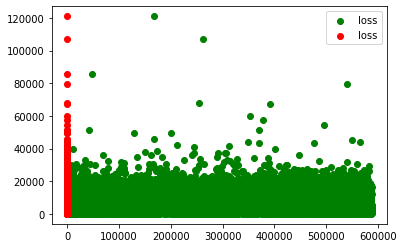

In [16]:
plt.scatter(x = 'id',y = 'loss',data = df,color = 'g')
plt.scatter(x = 'cont1',y = 'loss',data = df,color = 'r')

#Describe all the elements of a graph
plt.legend()

#show the graph
plt.show()

In [17]:
#Filling Out Numerical Columns from the Dataset

df_num = df.select_dtypes(include = [np.number])
print(df_num)
# Print heading names of columns contain only numbers
df_num.columns

            id     cont1     cont2     cont3     cont4     cont5     cont6  \
0            1  0.726300  0.245921  0.187583  0.789639  0.310061  0.718367   
1            2  0.330514  0.737068  0.592681  0.614134  0.885834  0.438917   
2            5  0.261841  0.358319  0.484196  0.236924  0.397069  0.289648   
3           10  0.321594  0.555782  0.527991  0.373816  0.422268  0.440945   
4           11  0.273204  0.159990  0.527991  0.473202  0.704268  0.178193   
...        ...       ...       ...       ...       ...       ...       ...   
188313  587620  0.347403  0.785784  0.613660  0.473202  0.939556  0.242437   
188314  587624  0.507661  0.555782  0.549770  0.802892  0.704268  0.334270   
188315  587630  0.484469  0.785784  0.792378  0.189137  0.482436  0.345883   
188316  587632  0.438385  0.422197  0.298977  0.383428  0.340543  0.704364   
188317  587633  0.907272  0.620805  0.440642  0.821574  0.281143  0.844563   

           cont7    cont8    cont9   cont10    cont11    cont12

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'loss'],
      dtype='object')

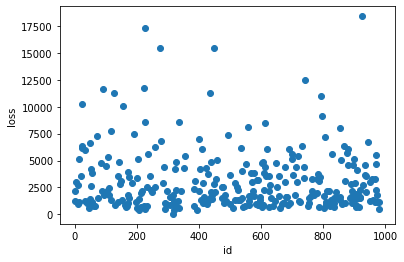

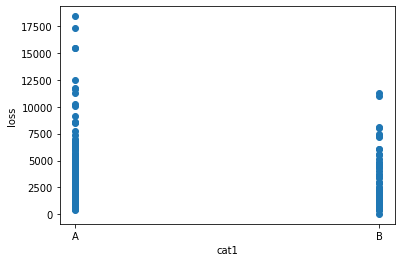

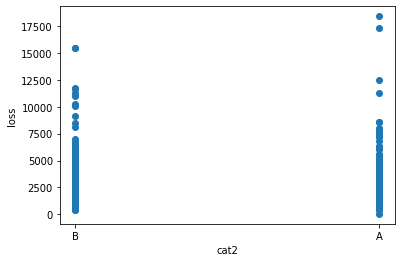

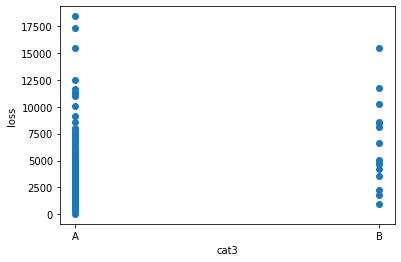

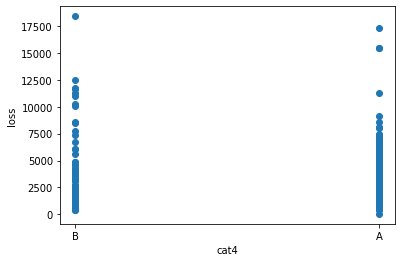

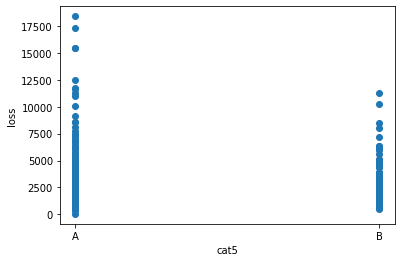

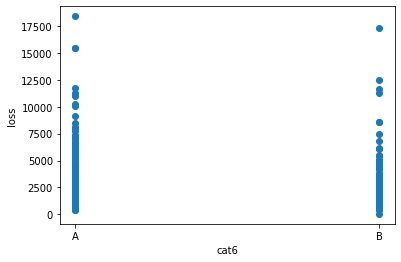

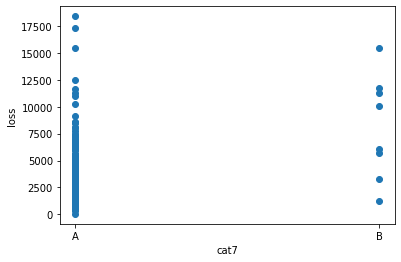

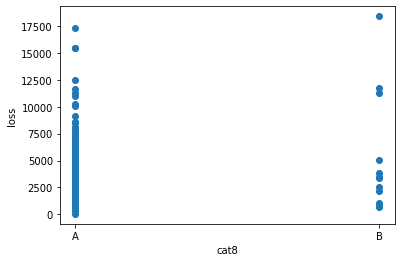

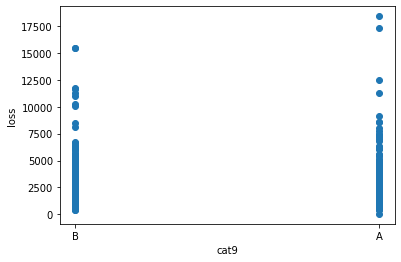

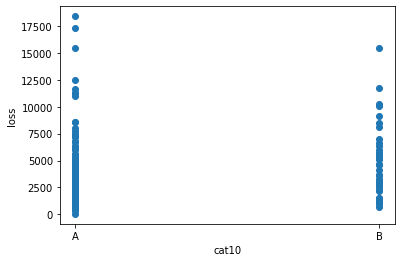

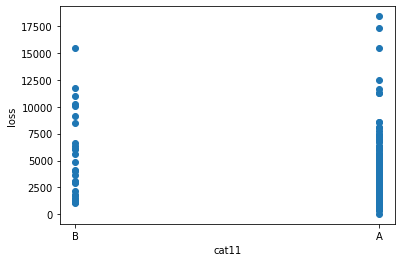

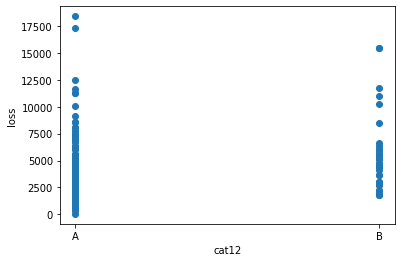

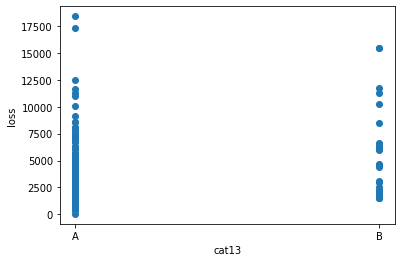

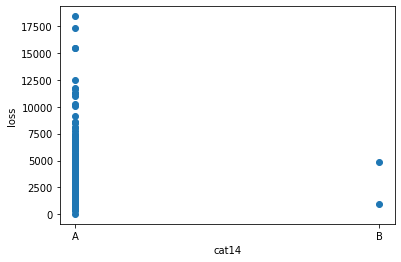

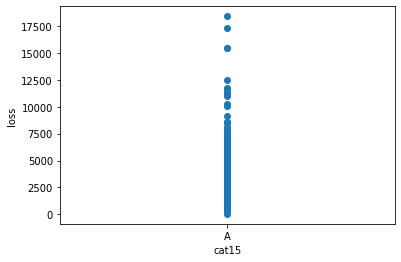

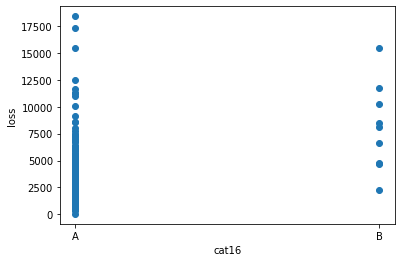

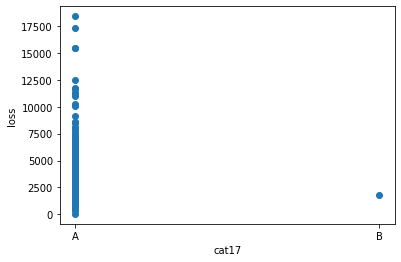

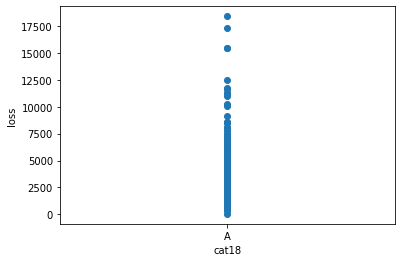

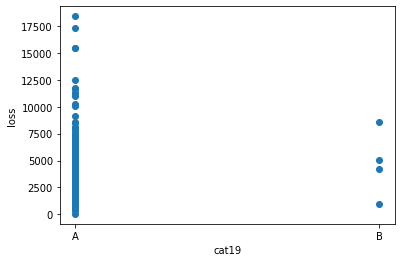

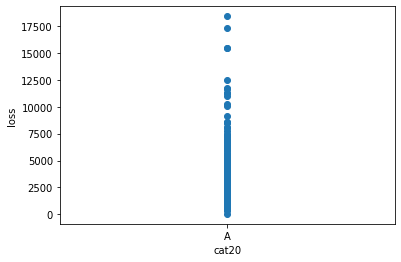

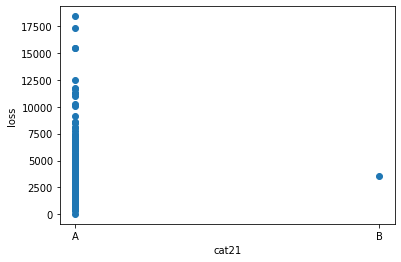

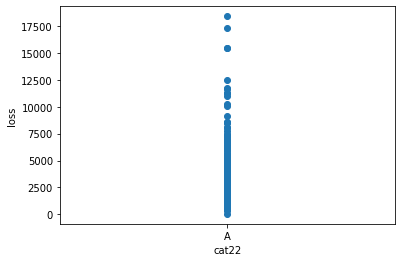

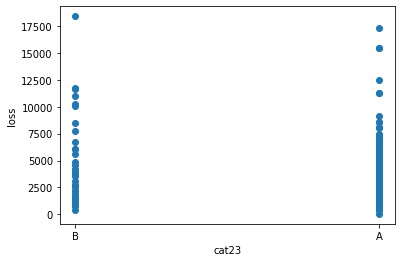

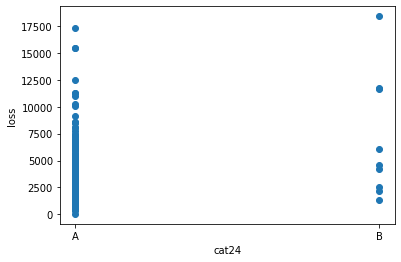

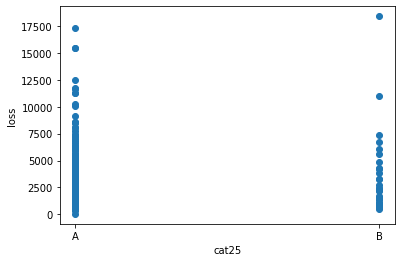

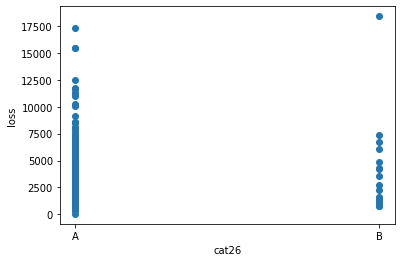

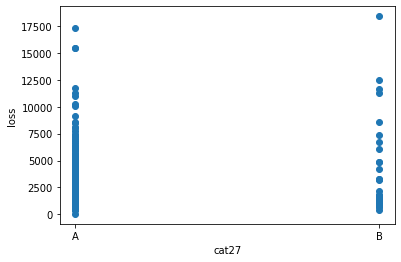

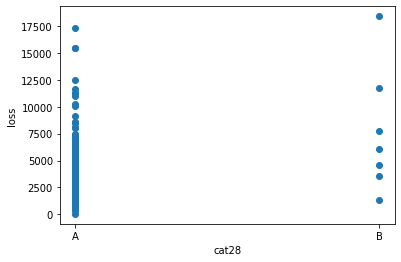

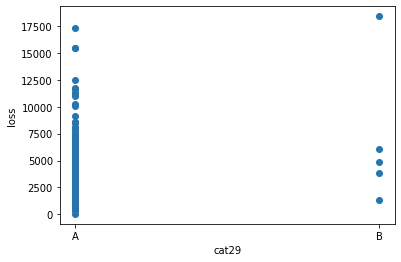

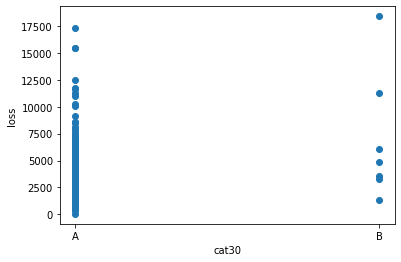

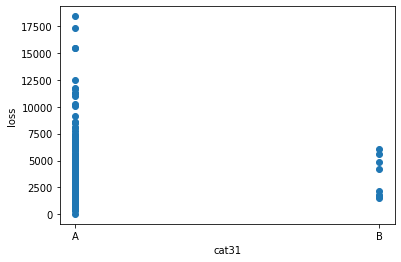

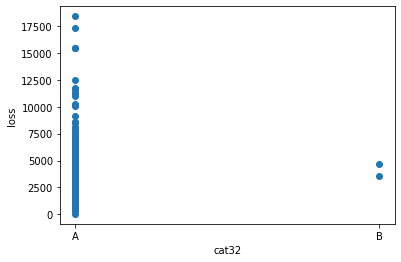

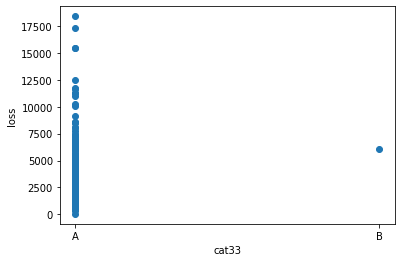

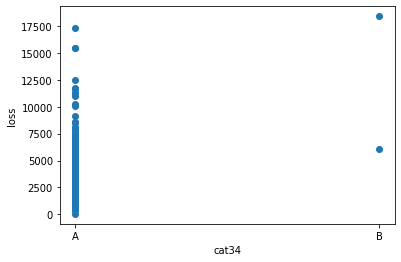

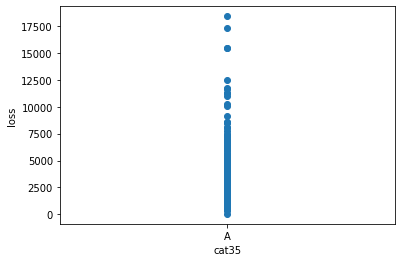

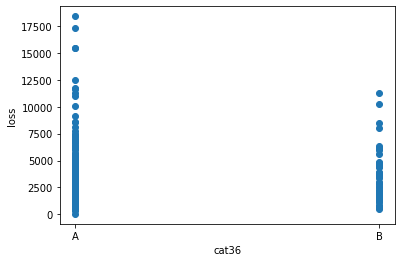

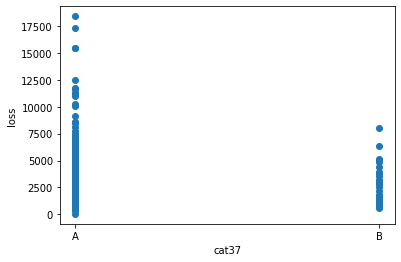

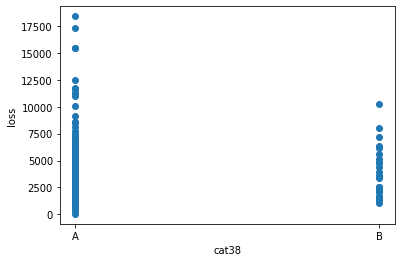

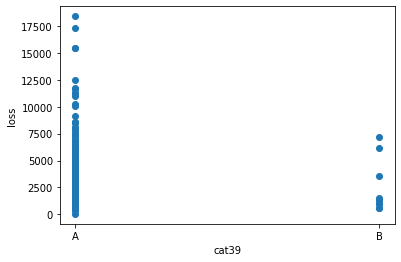

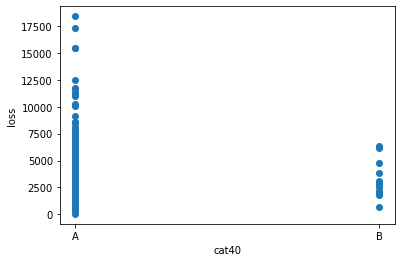

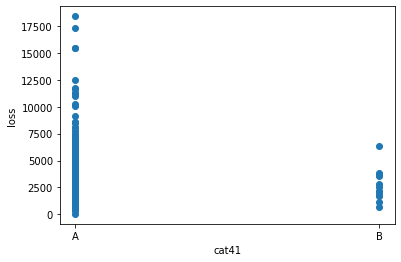

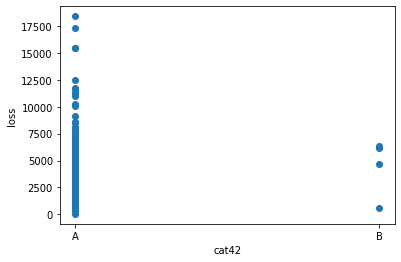

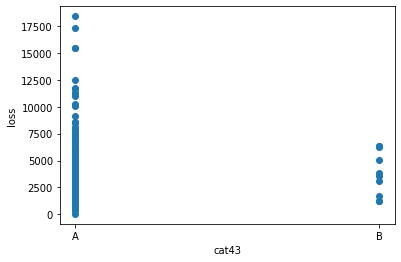

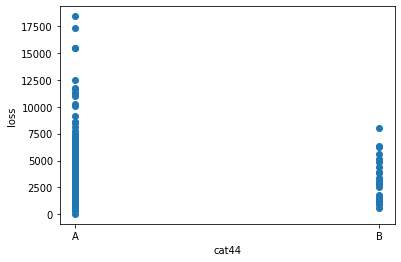

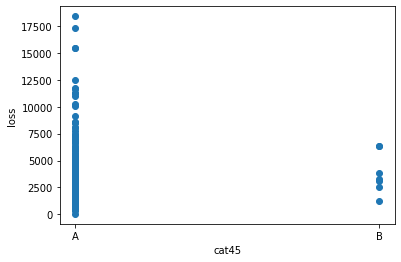

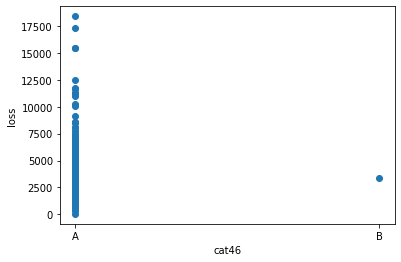

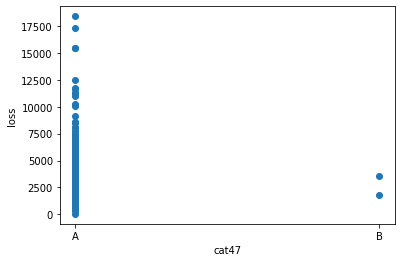

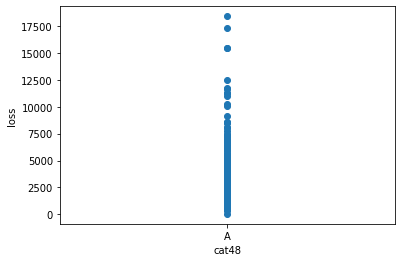

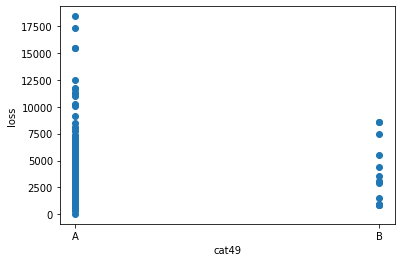

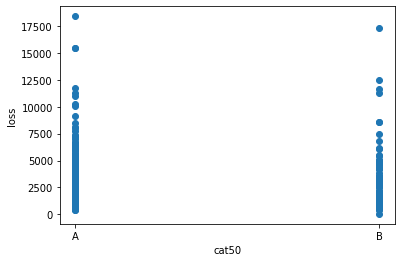

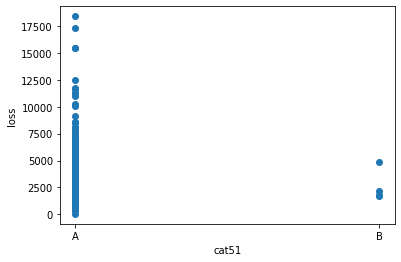

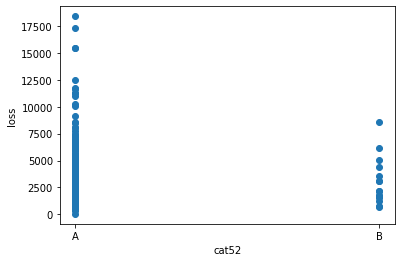

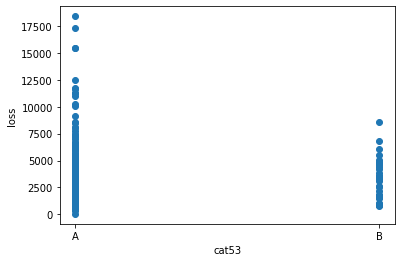

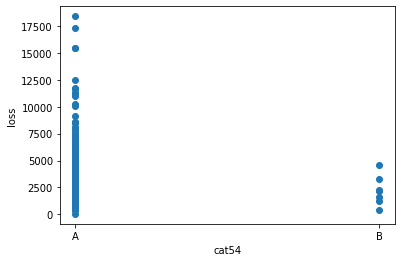

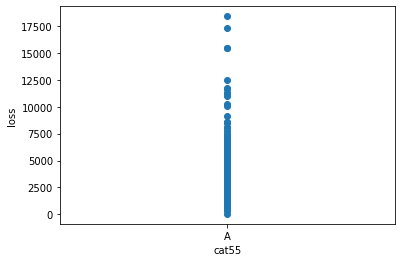

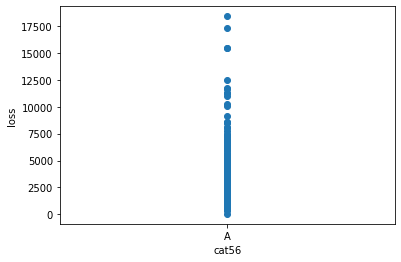

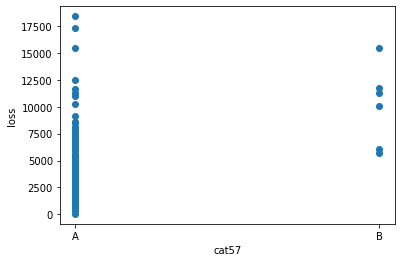

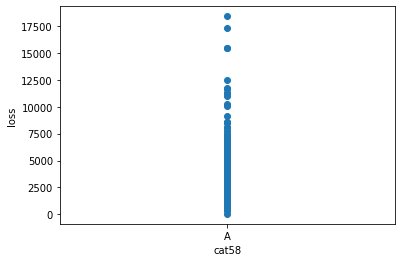

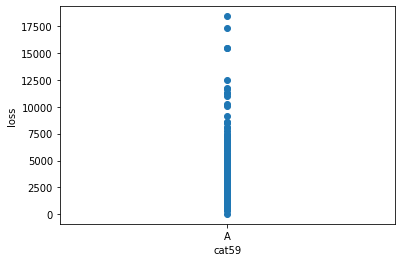

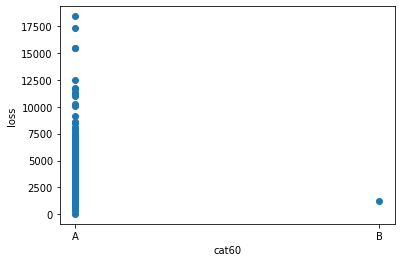

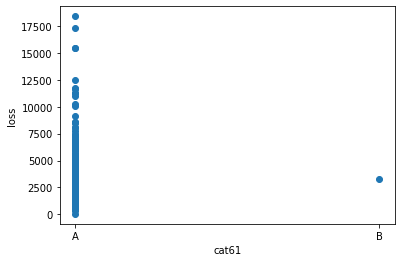

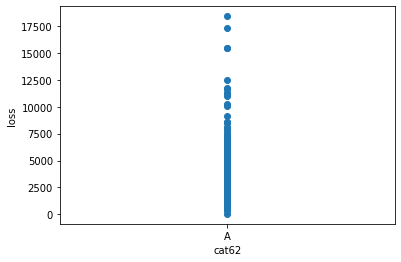

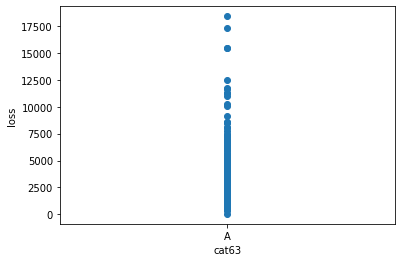

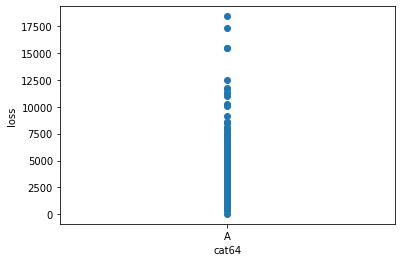

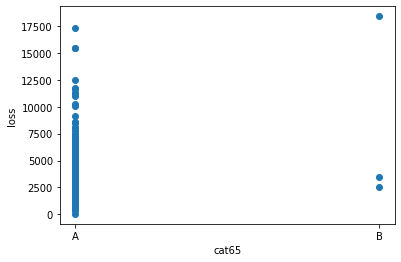

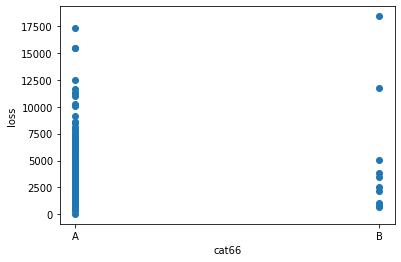

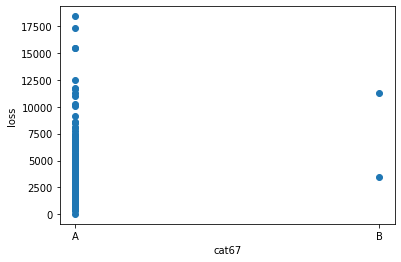

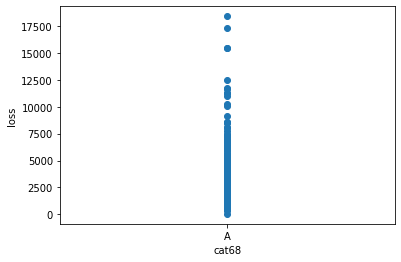

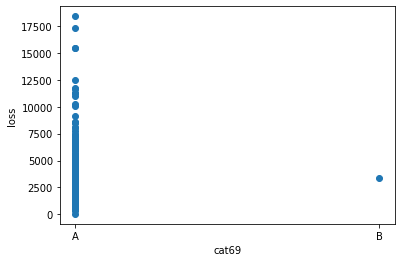

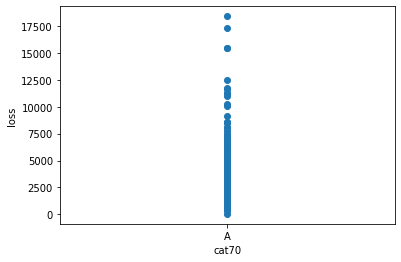

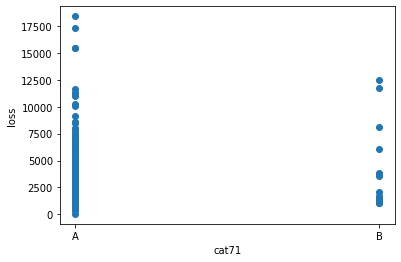

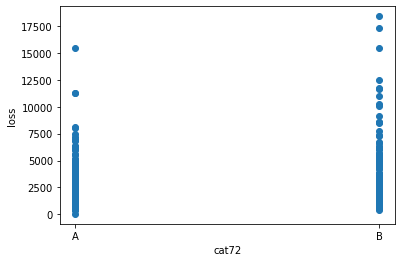

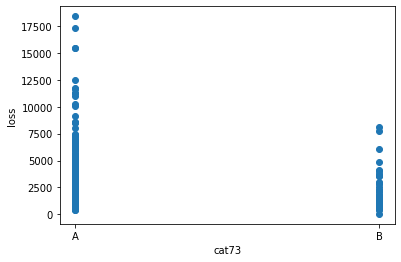

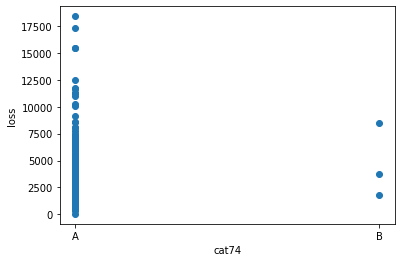

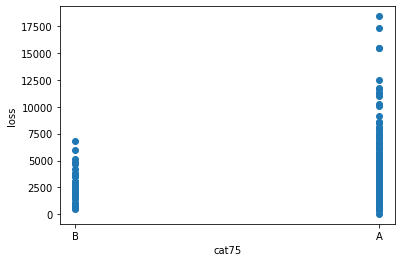

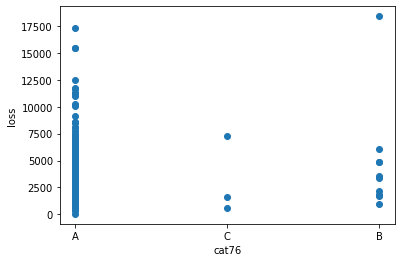

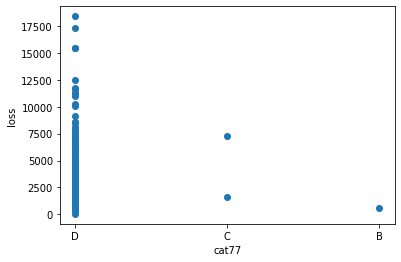

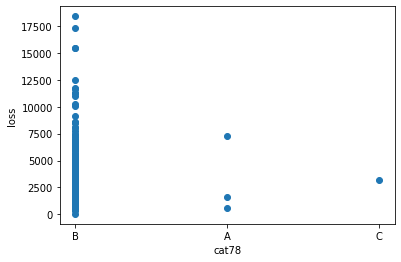

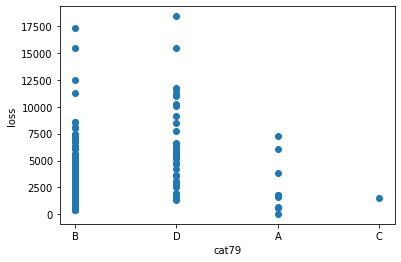

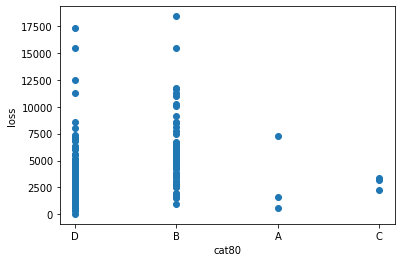

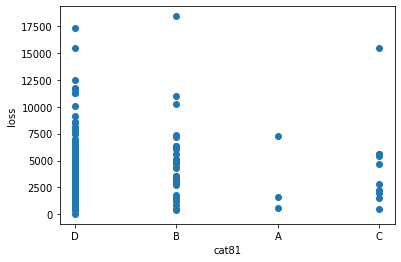

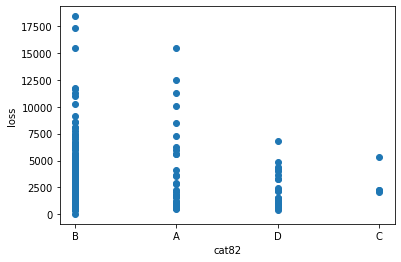

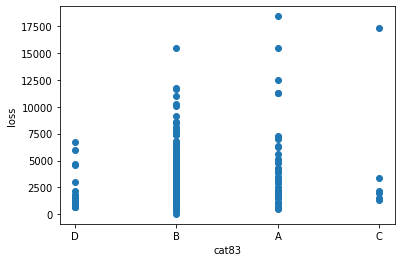

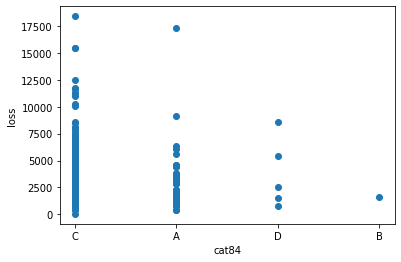

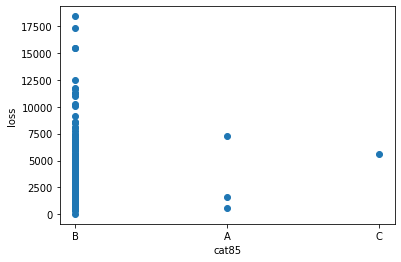

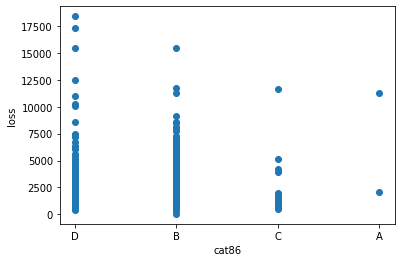

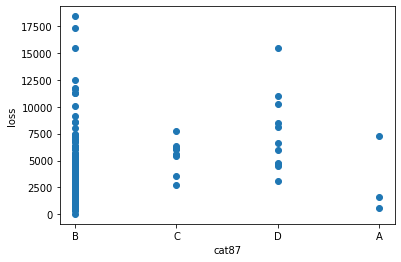

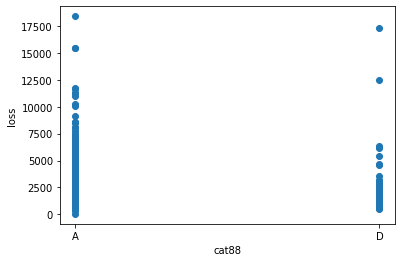

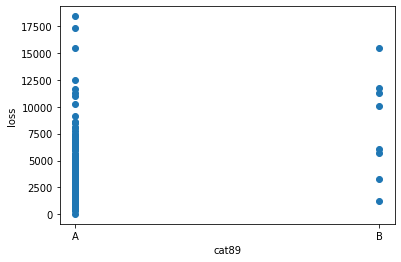

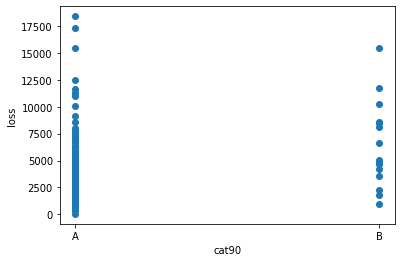

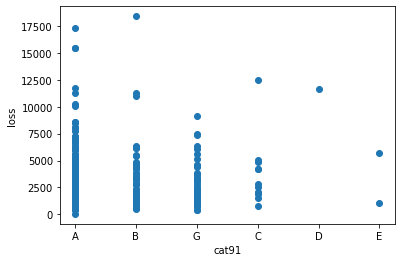

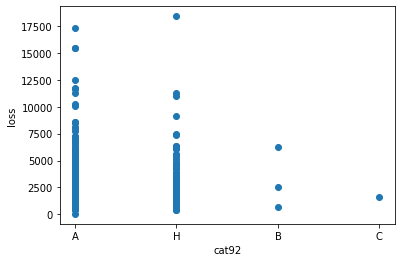

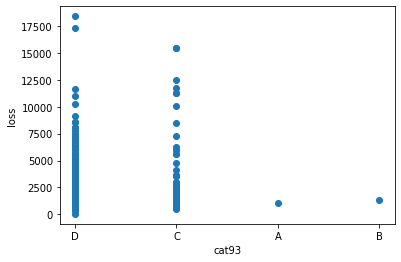

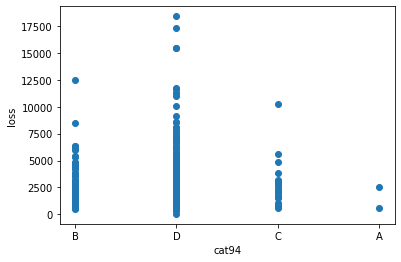

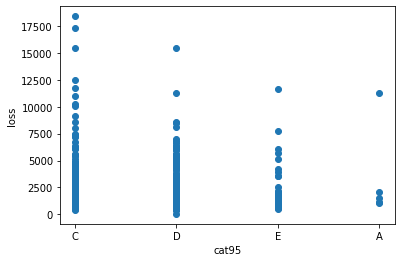

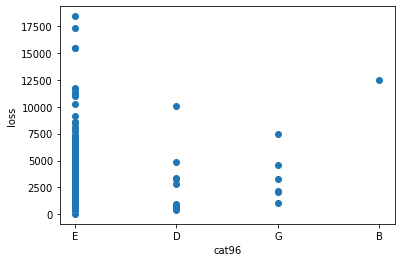

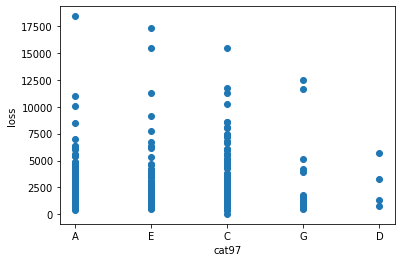

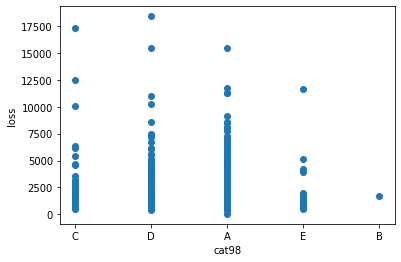

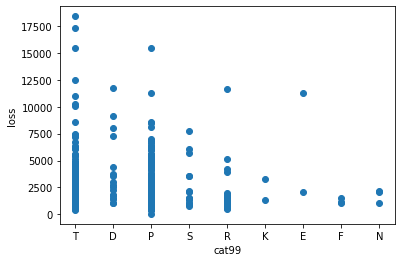

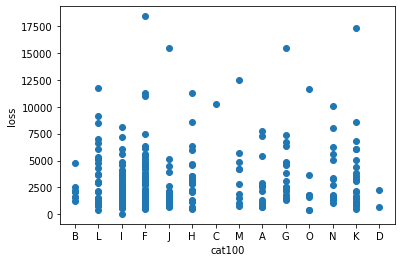

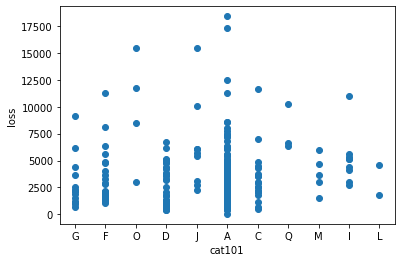

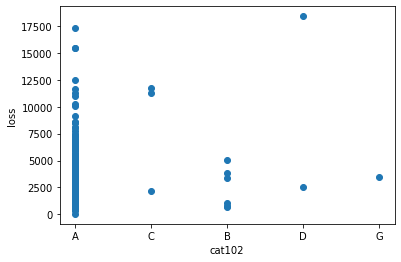

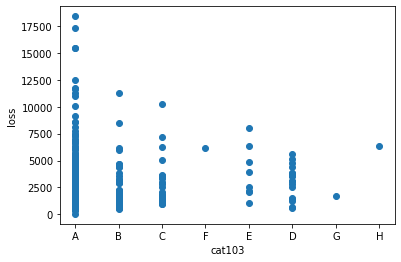

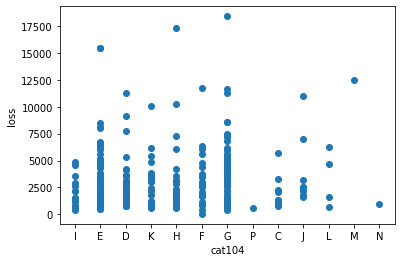

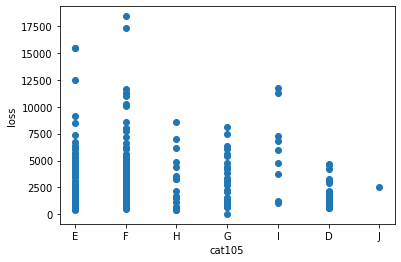

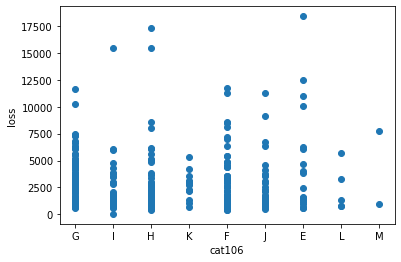

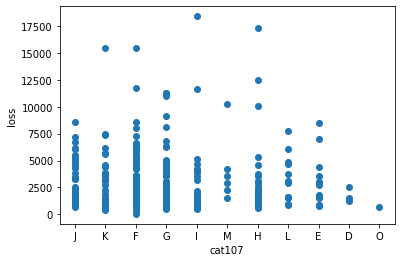

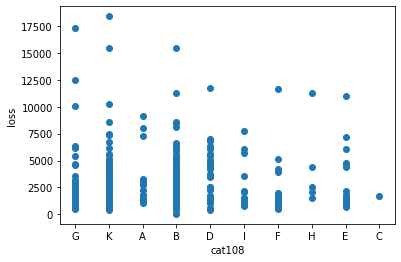

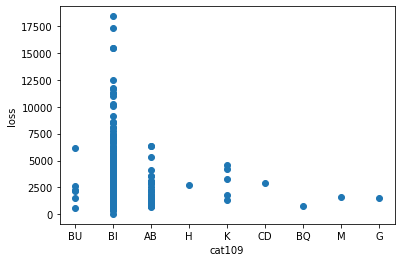

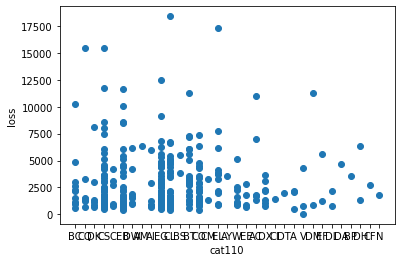

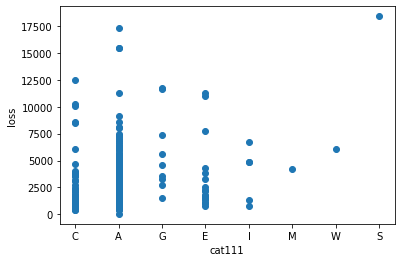

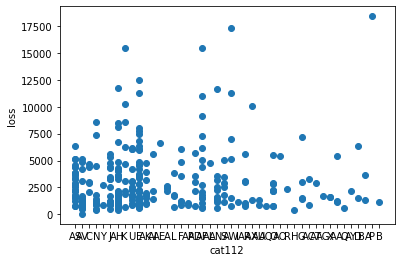

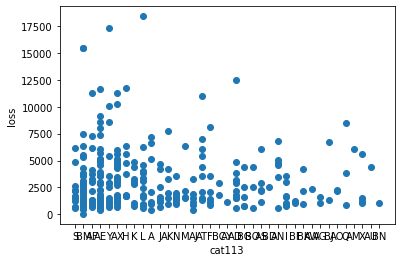

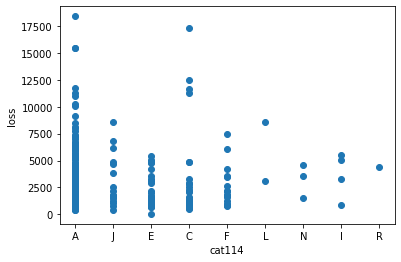

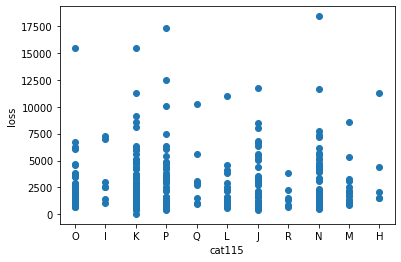

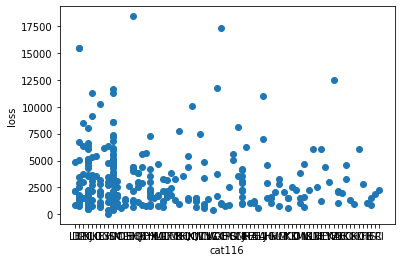

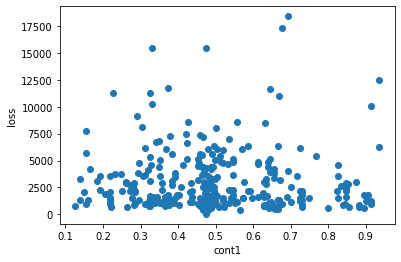

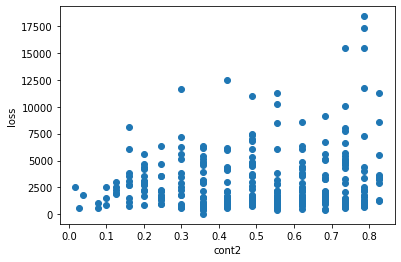

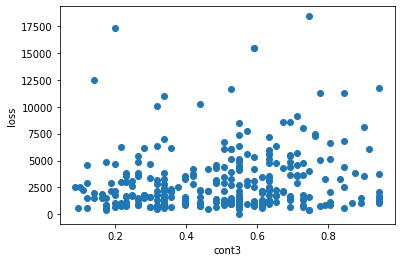

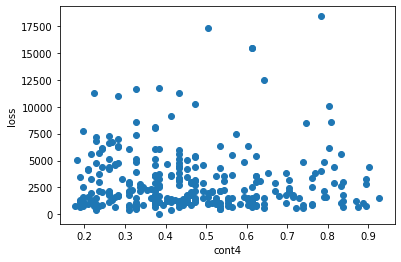

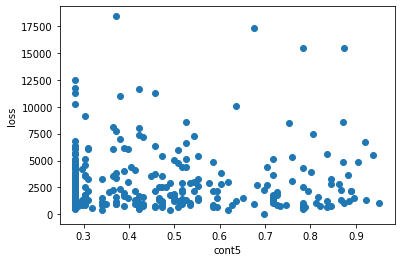

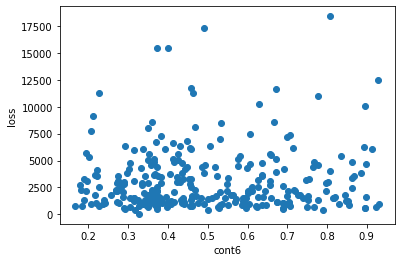

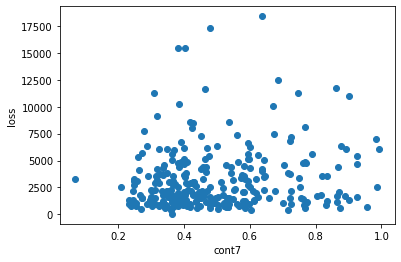

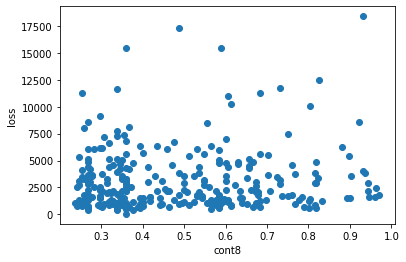

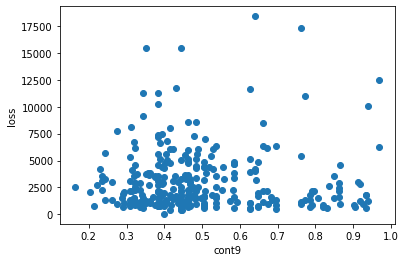

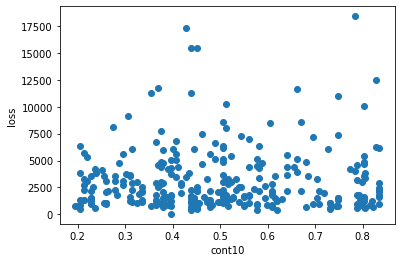

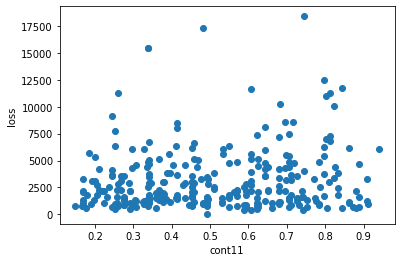

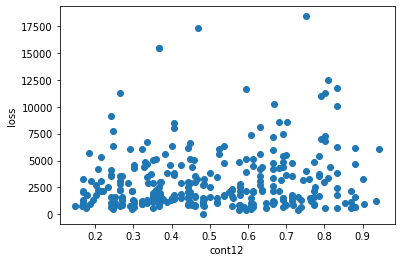

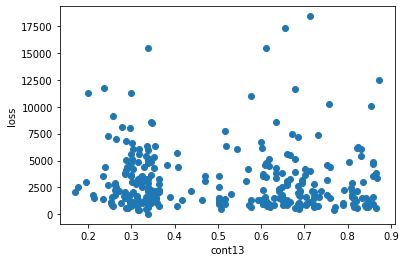

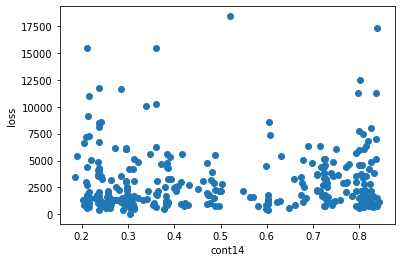

In [18]:
for i in df.columns[:-1]:
    plt.xlabel(i)
    plt.ylabel("loss")
    plt.scatter(df[i][:300],df["loss"][:300])
    plt.show()

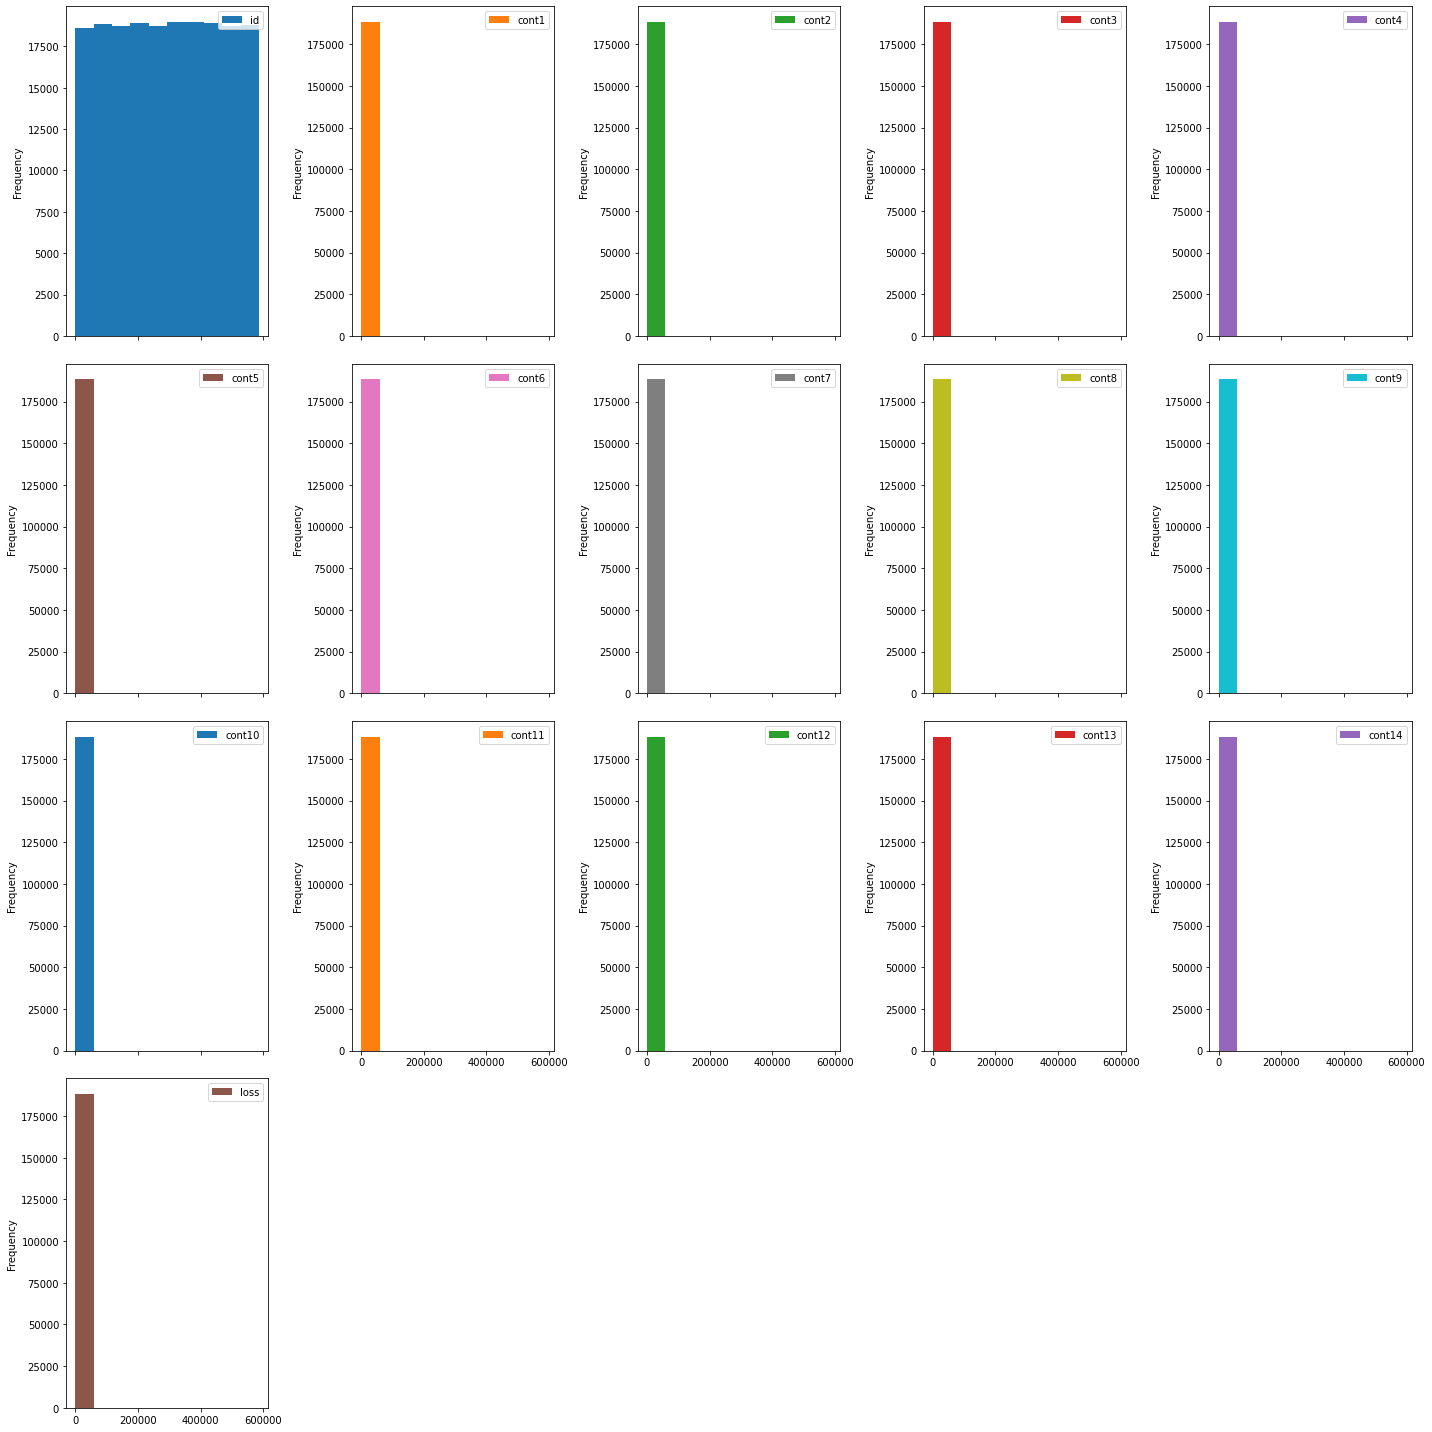

In [19]:
# plot multiple histogram for all the numerical column in my data set:
df.plot.hist(subplots = True , layout = (4,5),figsize=(20,20))
# rearrange the plot:
plt.tight_layout()
plt.show()

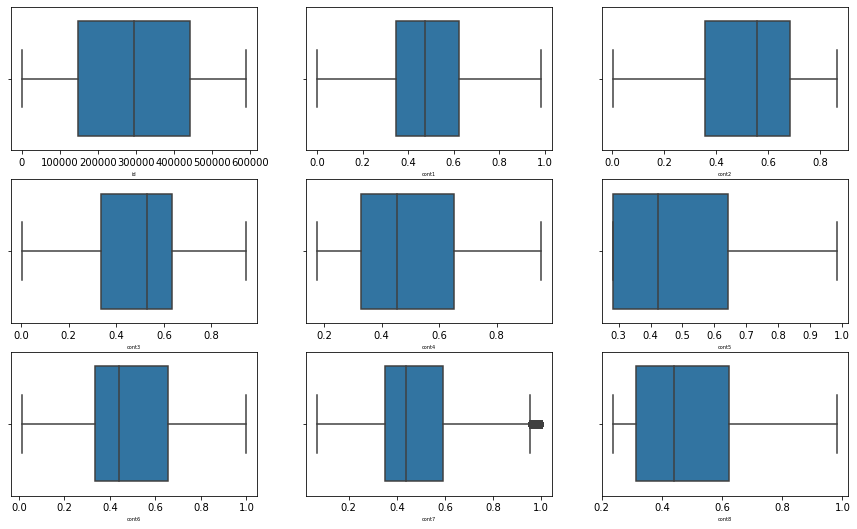

In [37]:
#To identify the Outliers in Numerical Columns:
#Subplots()
fig, ax = plt.subplots(3,3,figsize =(15,9))
for variable,subplot in zip(df_num.columns,ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = 'h',whis = 1.5,ax = subplot)
    
    z.set_xlabel(variable,fontsize = 5)

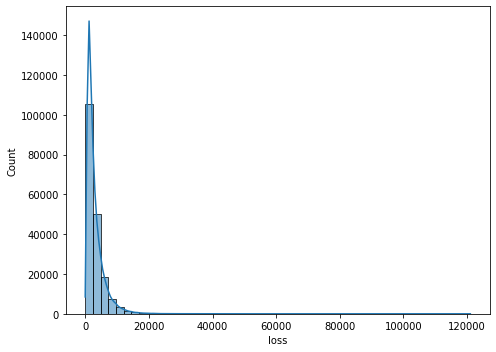

In [20]:
y = df.iloc[:, -1]
plt.figure(figsize=(7, 5))
sns.histplot(data=y, kde=True, bins=50)
plt.tight_layout()

In [21]:
# Label Encoding

# The label Encoding consider a level in a Categorical variable by 'Alphabetical Order'

from sklearn.preprocessing import LabelEncoder
# Create an Instance
labelencoder = LabelEncoder()

#Fit the Encoder
df['Encoded_performance_of_cat1'] = labelencoder.fit_transform(df['cat1'])

# Display the data
df

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont7  \
0            1    A    B    A    B    A    A    A    A    B  ...  0.335060   
1            2    A    B    A    A    A    A    A    A    B  ...  0.436585   
2            5    A    B    A    A    B    A    A    A    B  ...  0.315545   
3           10    B    B    A    B    A    A    A    A    B  ...  0.391128   
4           11    A    B    A    B    A    A    A    A    B  ...  0.247408   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
188313  587620    A    B    A    A    A    A    A    A    B  ...  0.289949   
188314  587624    A    A    A    A    A    B    A    A    A  ...  0.382000   
188315  587630    A    B    A    A    A    A    A    B    B  ...  0.370534   
188316  587632    A    B    A    A    A    A    A    A    B  ...  0.562866   
188317  587633    B    A    A    B    A    A    A    A    A  ...  0.533048   

          cont8    cont9   cont10    cont11    cont12    cont13    cont14  \
0       0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843   
1       0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496   
2       0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425   
3       0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   
4       0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606   
...         ...      ...      ...       ...       ...       ...       ...   
188313  0.24564  0.30859  0.32935  0.223038  0.220003  0.333292  0.208216   
188314  0.63475  0.40455  0.47779  0.307628  0.301921  0.318646  0.305872   
188315  0.24564  0.45808  0.47779  0.445614  0.443374  0.339244  0.503888   
188316  0.34987  0.44767  0.53881  0.863052  0.852865  0.654753  0.721707   
188317  0.97123  0.93383  0.83814  0.932195  0.946432  0.810511  0.721460   

           loss Encoded_performance_of_cat1  
0       2213.18                           0  
1       1283.60                           0  
2       3005.09                           0  
3        939.85                           1  
4       2763.85                           0  
...         ...                         ...  
188313  1198.62                           0  
188314  1108.34                           0  
188315  5762.64                           0  
188316  1562.87                           0  
188317  4751.72                           1  

[188318 rows x 133 columns]

In [22]:
print(df['cat1'].value_counts())
print('\n')
df['Encoded_performance_of_cat1'].value_counts()

A    141550
B     46768
Name: cat1, dtype: int64




0    141550
1     46768
Name: Encoded_performance_of_cat1, dtype: int64

In [23]:
x = np.array(df["cont1"]).reshape(-1,1)
y = np.array(df["loss"]).reshape(-1,1)

In [24]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x,y)
linear.predict([[12]])

array([[1214.35169353]])

In [25]:
## multiple Regression
x = df.drop("loss",axis = 1)
y = df["loss"]

<AxesSubplot:xlabel='cont14', ylabel='loss'>

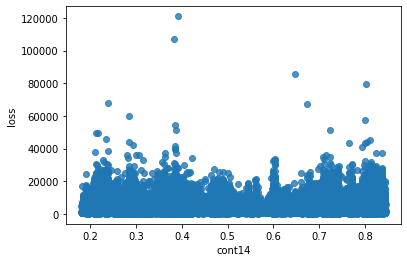

In [68]:
sns.regplot(x="cont14",y="loss",data = df)

In [27]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df_num.drop("loss",axis = 1),df_num["id"],train_size = .75)

In [71]:
xtrain.shape

(141238, 15)

In [29]:
ytrain.shape

(141238,)

In [30]:
xtest.shape

(47080, 15)

In [31]:
ytest.shape

(47080,)

In [53]:
ytest.isnull().sum()

0

In [32]:
model = LinearRegression()

In [33]:
model.fit(xtrain,ytrain)

LinearRegression()

In [34]:
y_pred = model.predict(xtest)

In [35]:
ytest.head(10)

19407      61089
59649     186897
157826    491890
74298     232234
168874    526714
100911    315340
148414    462856
188085    586944
24040      75564
42362     132985
Name: id, dtype: int64

In [36]:
xtest.head(10)

id     cont1     cont2     cont3     cont4     cont5     cont6  \
19407    61089  0.513457  0.681761  0.549770  0.594598  0.811271  0.416181   
59649   186897  0.703859  0.488789  0.263570  0.623770  0.783230  0.874303   
157826  491890  0.355333  0.681761  0.692825  0.284048  0.281143  0.526202   
74298   232234  0.329232  0.358319  0.484196  0.373816  0.422268  0.372125   
168874  526714  0.546670  0.681761  0.728827  0.373816  0.422268  0.364464   
100911  315340  0.936584  0.245921  0.120071  0.661283  0.281143  0.903531   
148414  462856  0.292010  0.737068  0.634224  0.623770  0.281143  0.314937   
188085  586944  0.340859  0.785784  0.506105  0.267727  0.960658  0.369930   
24040    75564  0.475784  0.555782  0.462347  0.534409  0.889301  0.373500   
42362   132985  0.218540  0.488789  0.397983  0.524230  0.281143  0.342167   

           cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
19407   0.402349  0.62918  0.50630  0.37493  0.338312  0.331643  0.315758   
59649   0.687567  0.64577  0.64296  0.79504  0.644013  0.785706  0.862949   
157826  0.868961  0.43518  0.43111  0.36974  0.569745  0.557380  0.246011   
74298   0.388545  0.31796  0.32128  0.36974  0.307628  0.301921  0.608259   
168874  0.401162  0.26847  0.46226  0.50556  0.415029  0.406090  0.345247   
100911  0.553910  0.82939  0.96909  0.82889  0.797841  0.785706  0.854872   
148414  0.413673  0.67263  0.38249  0.29595  0.228492  0.225288  0.363547   
188085  0.405795  0.47669  0.31945  0.36458  0.341813  0.335036  0.598688   
24040   0.347485  0.36083  0.44352  0.45017  0.291268  0.295524  0.339244   
42362   0.291170  0.34987  0.31945  0.22755  0.275431  0.270746  0.503333   

          cont14  
19407   0.297754  
59649   0.361236  
157826  0.386839  
74298   0.295318  
168874  0.731187  
100911  0.361034  
148414  0.820613  
188085  0.774680  
24040   0.804101  
42362   0.381461

In [37]:
for i in y_pred[:10]:
    print(i)

61089.000000001055
186897.00000000047
491889.999999999
232234.00000000032
526713.9999999988
315339.99999999994
462855.9999999992
586943.9999999986
75564.00000000102
132985.00000000073


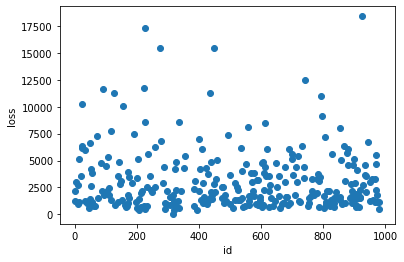

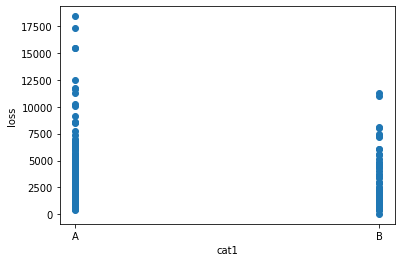

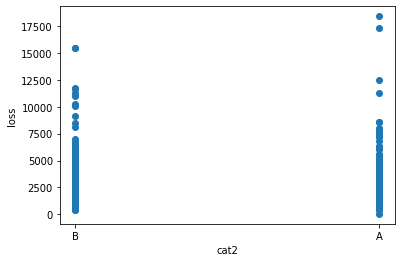

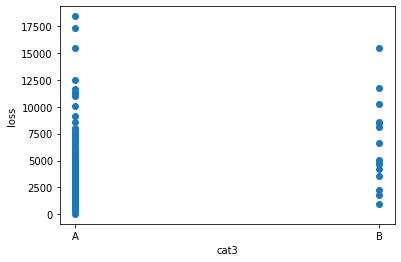

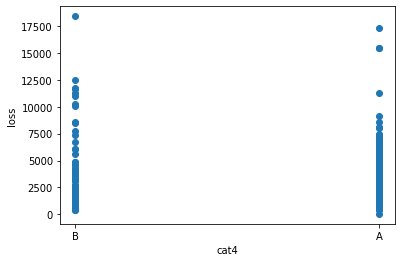

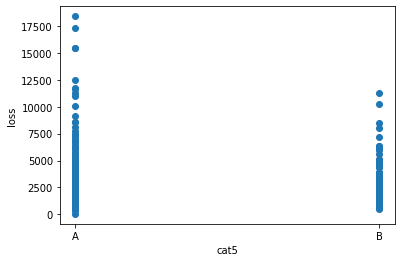

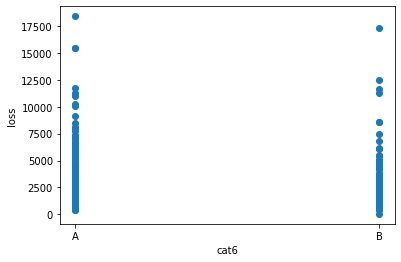

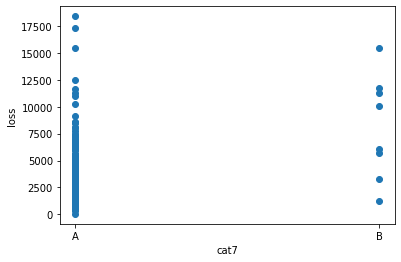

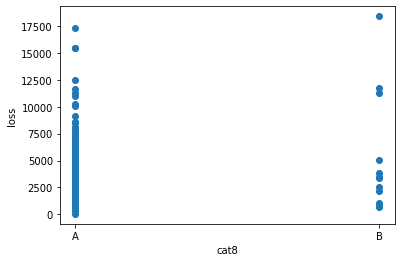

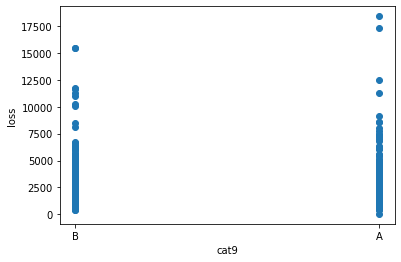

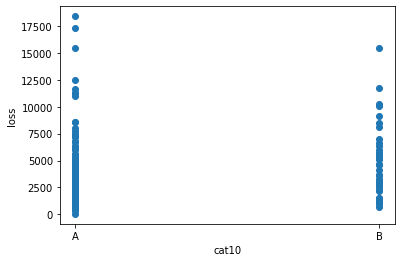

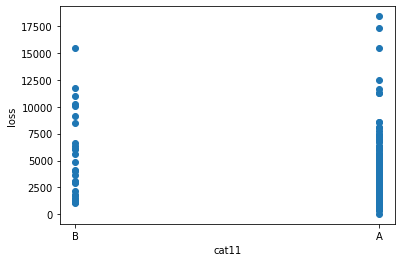

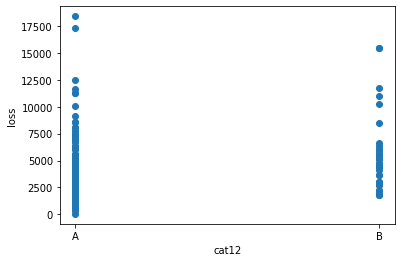

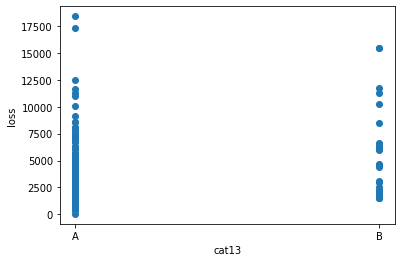

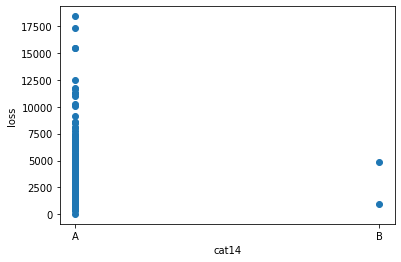

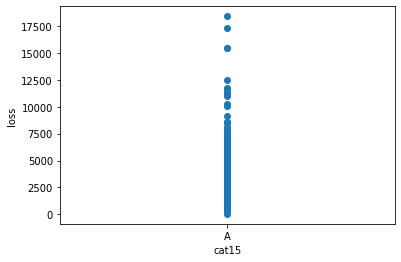

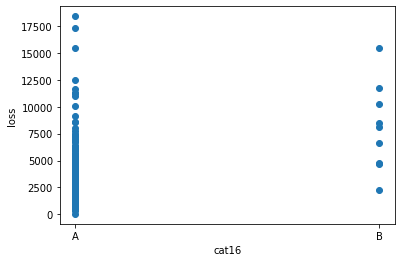

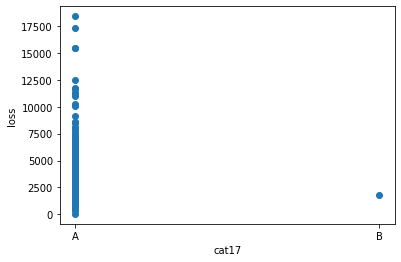

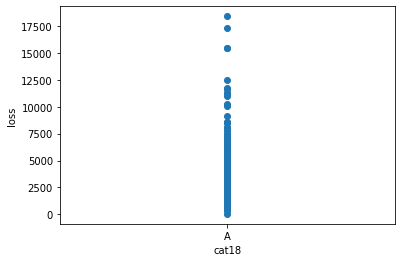

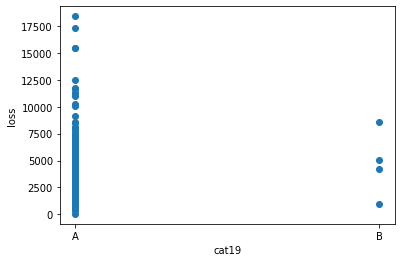

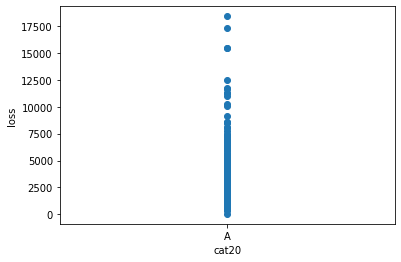

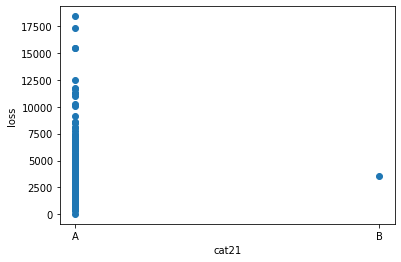

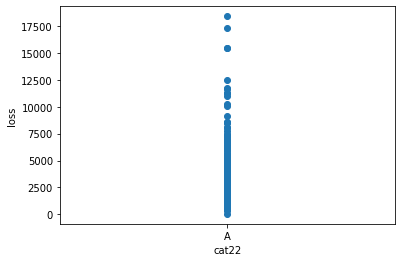

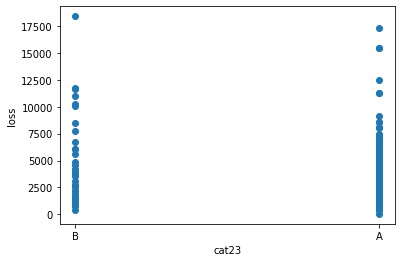

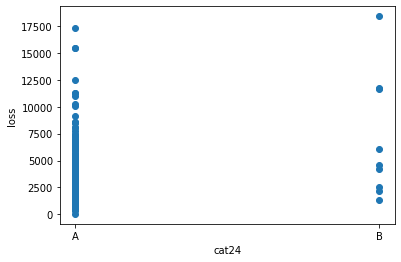

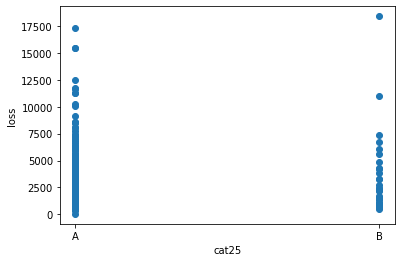

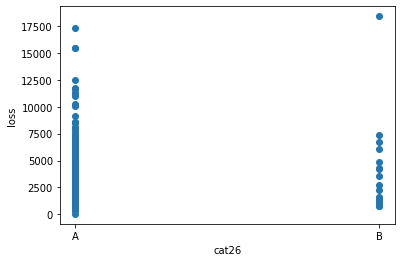

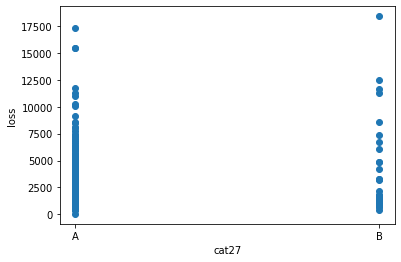

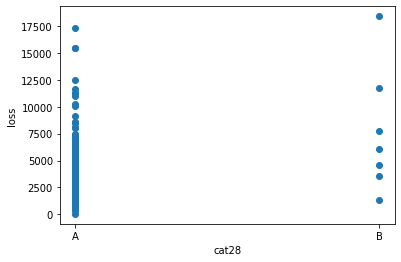

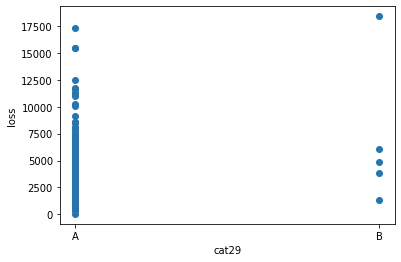

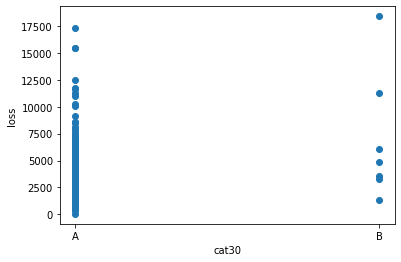

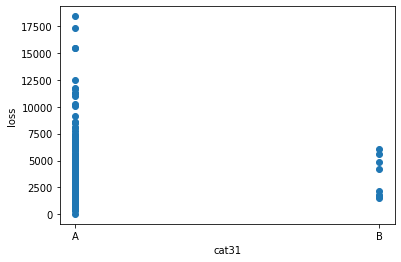

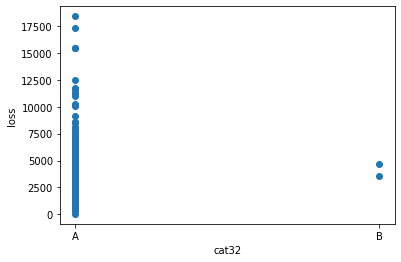

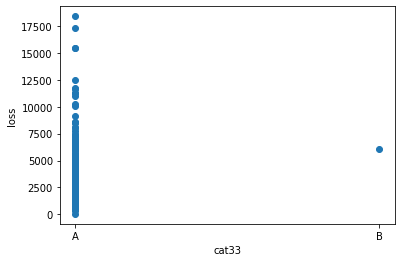

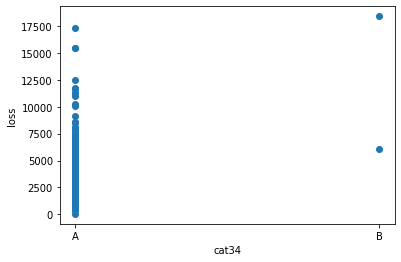

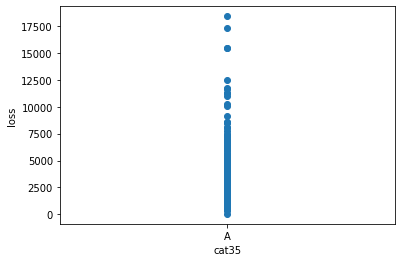

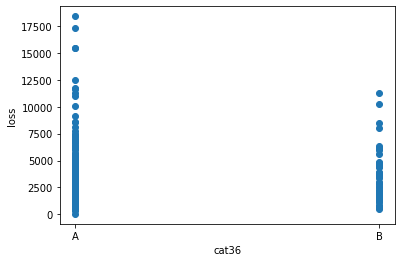

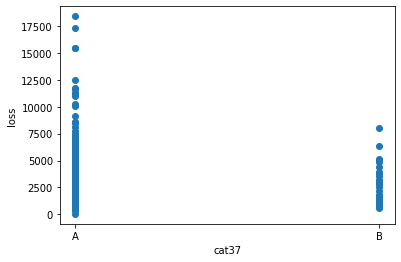

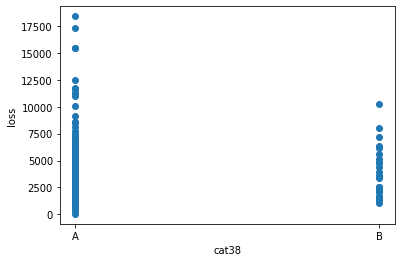

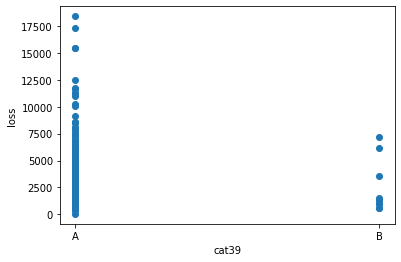

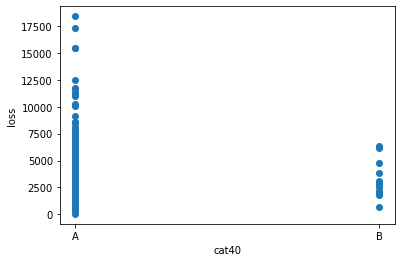

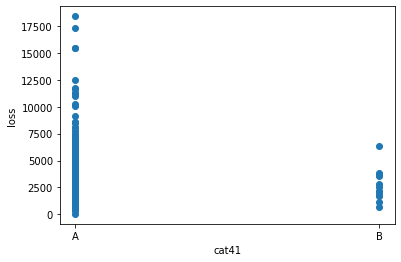

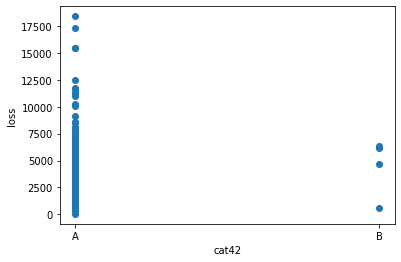

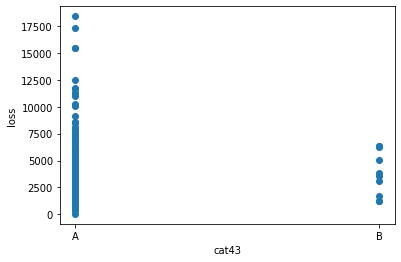

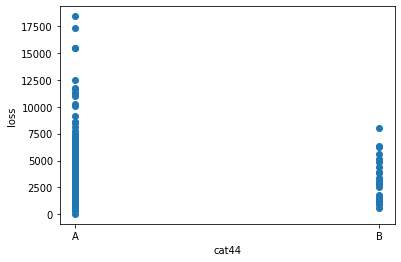

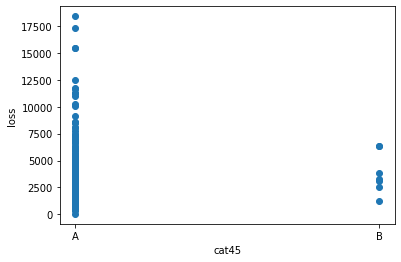

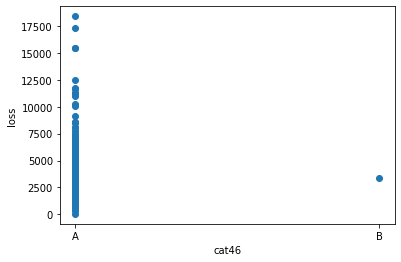

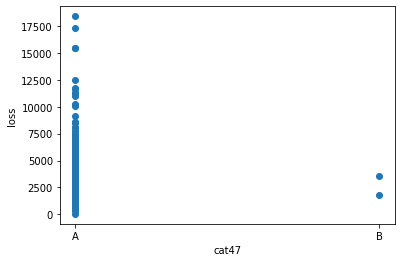

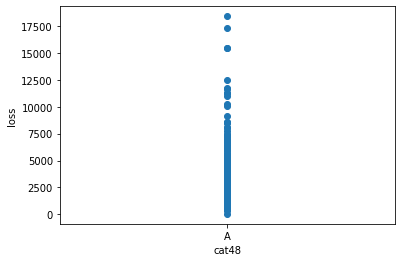

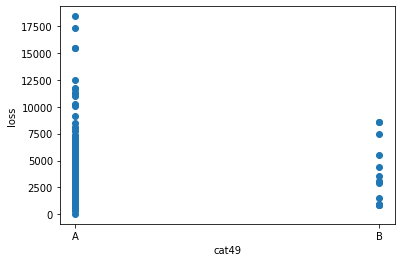

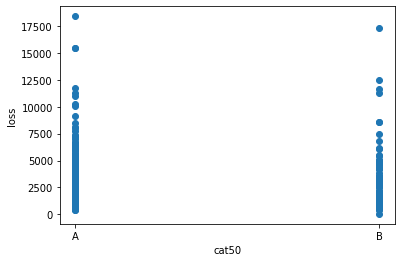

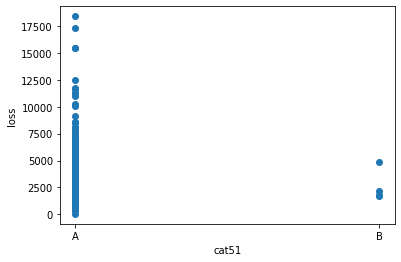

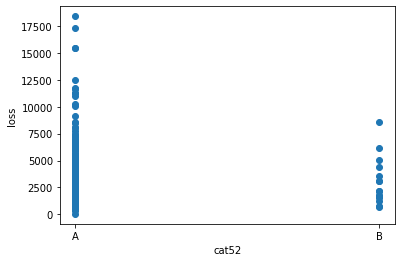

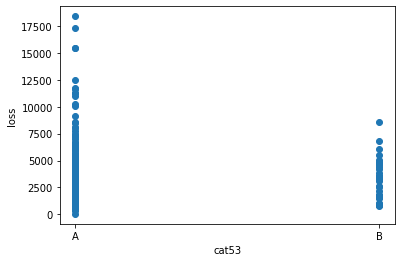

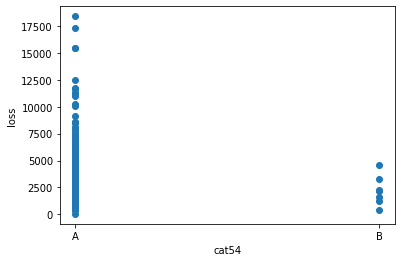

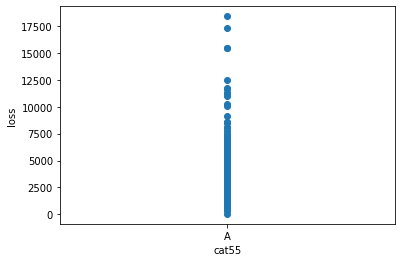

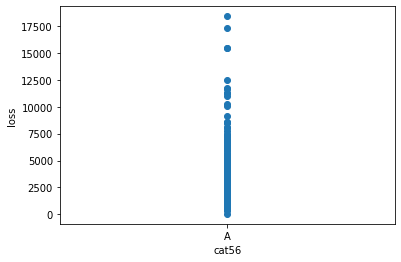

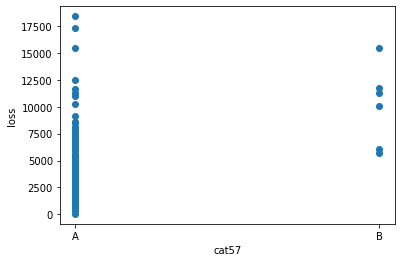

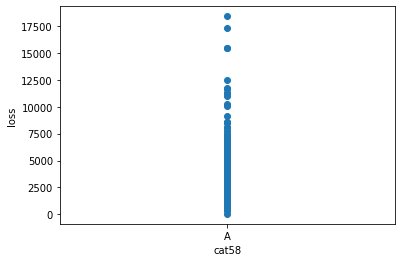

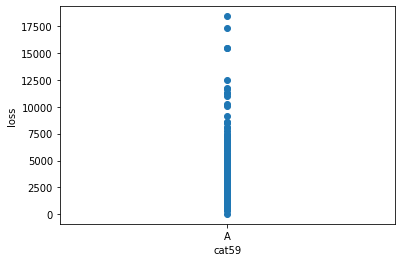

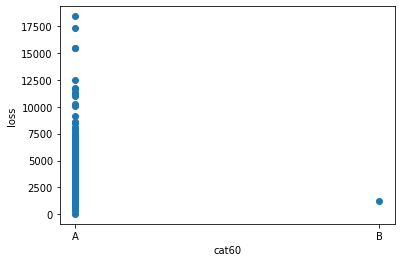

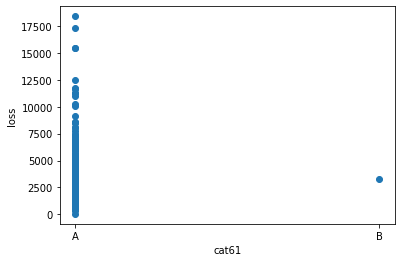

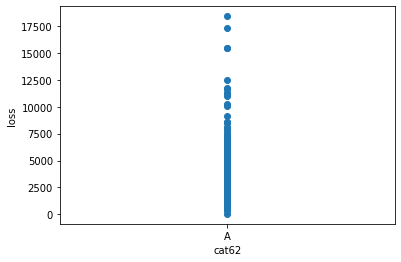

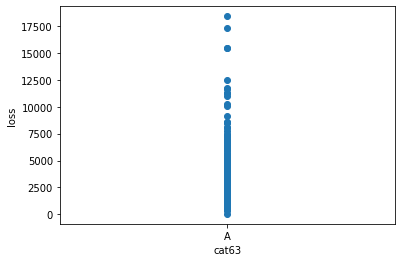

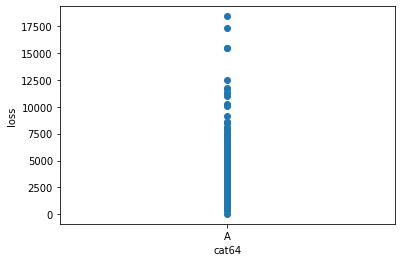

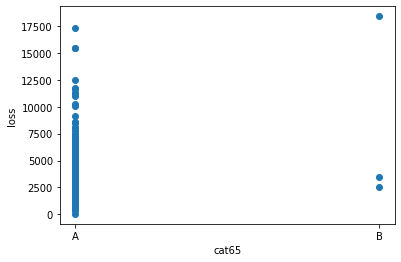

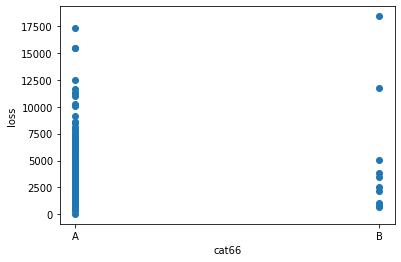

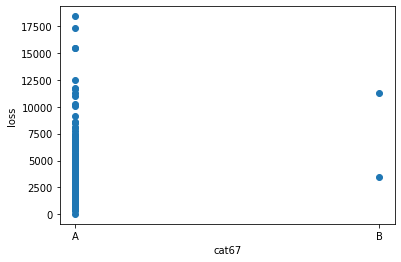

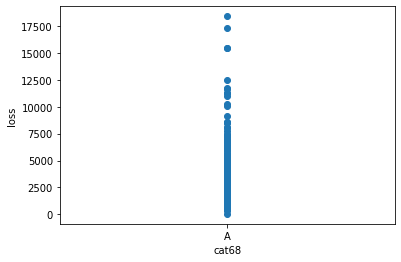

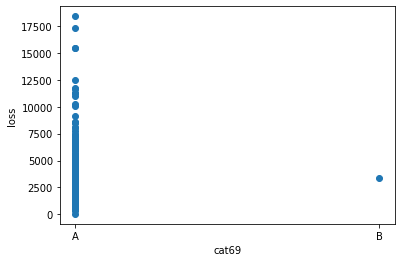

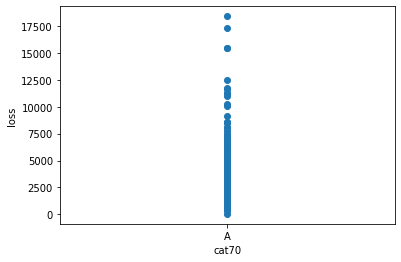

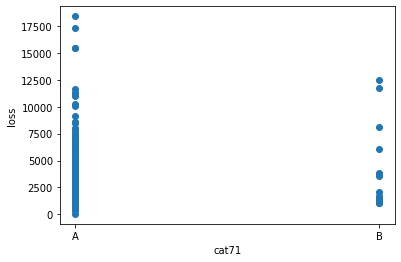

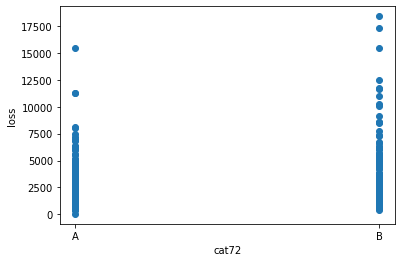

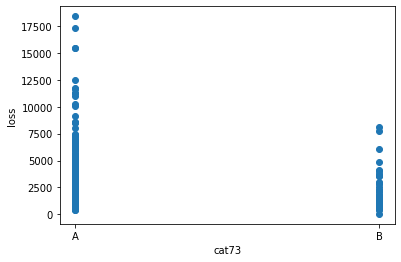

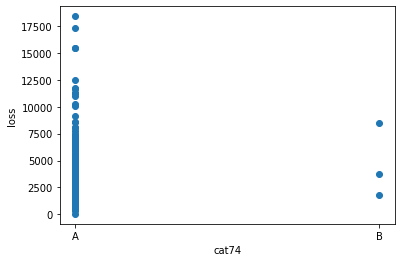

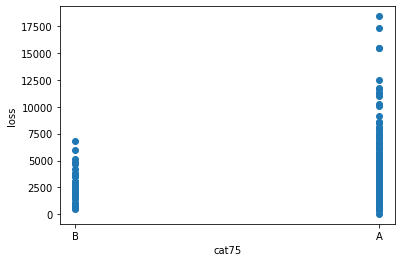

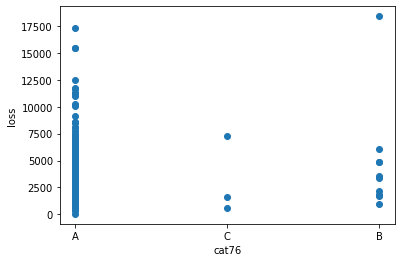

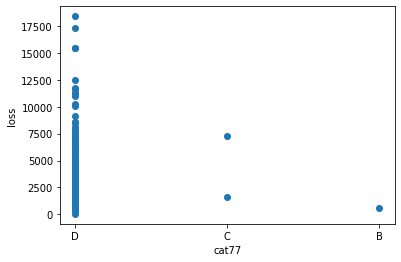

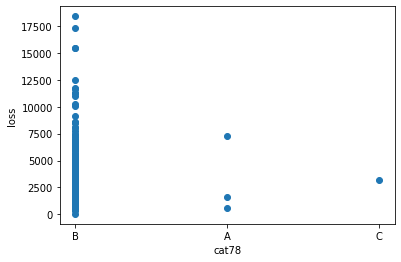

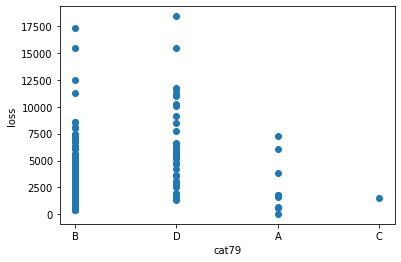

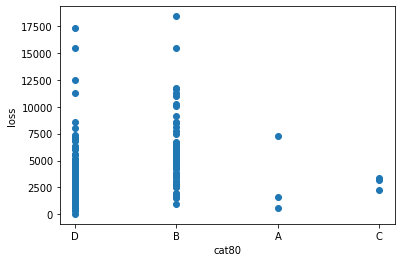

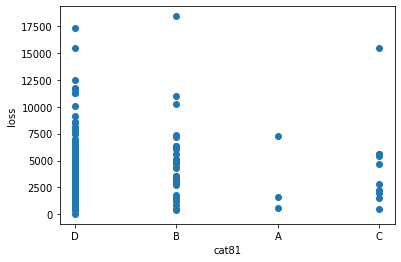

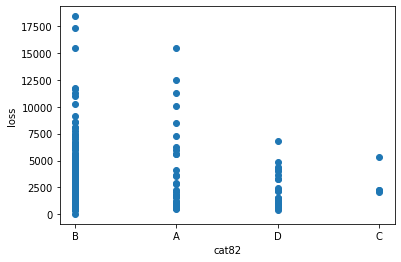

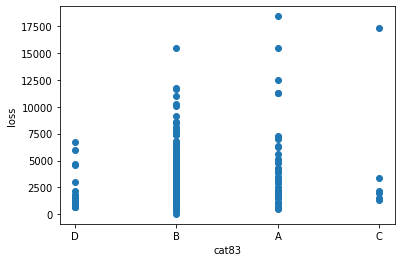

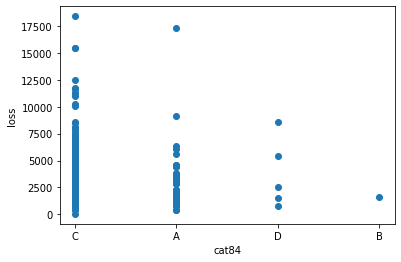

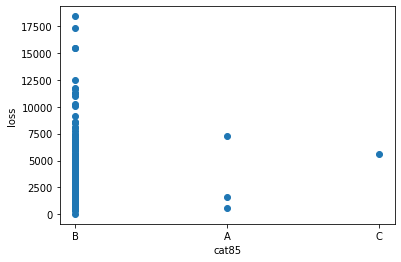

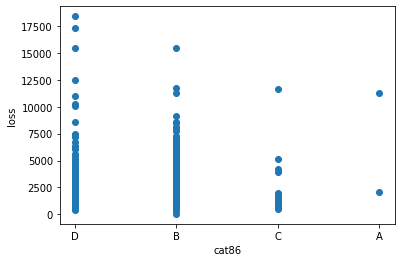

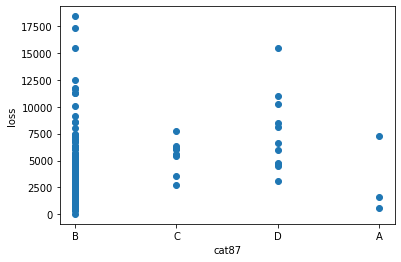

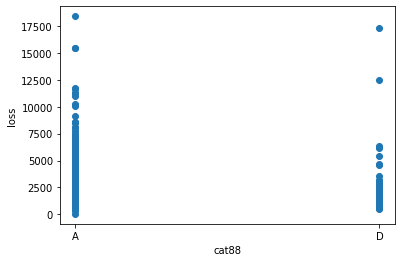

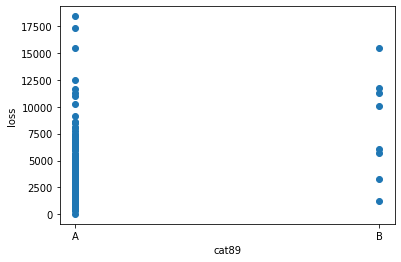

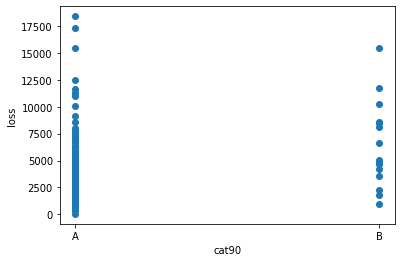

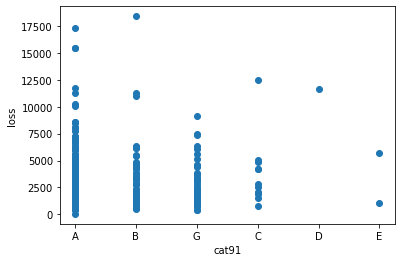

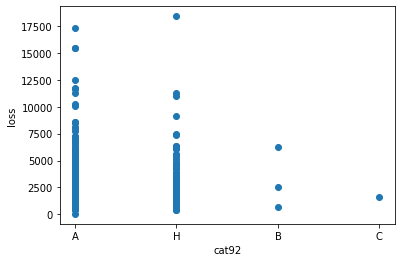

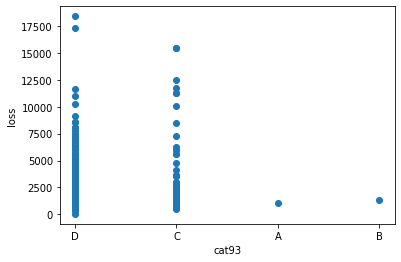

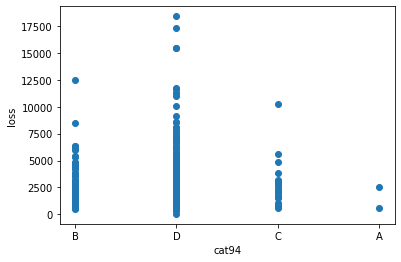

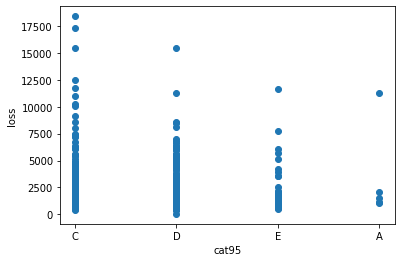

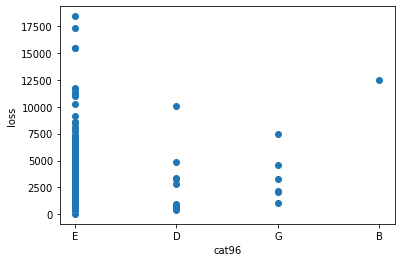

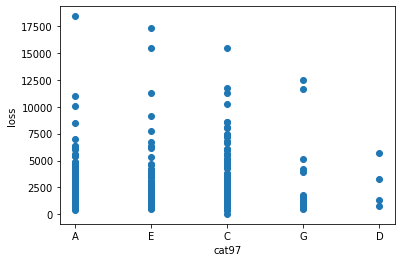

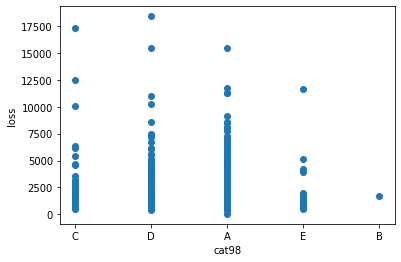

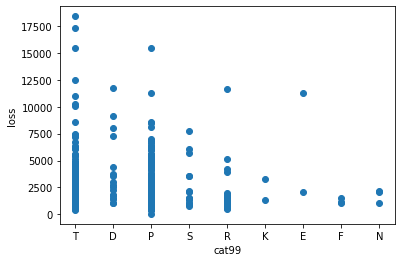

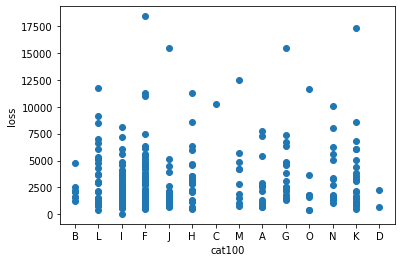

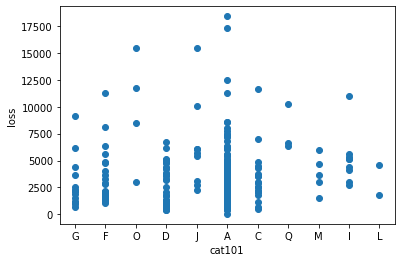

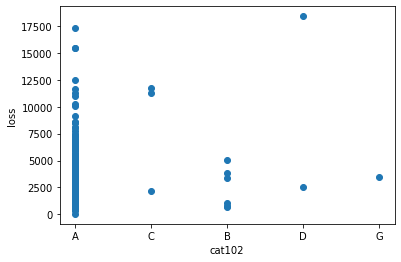

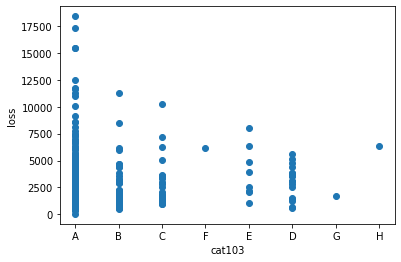

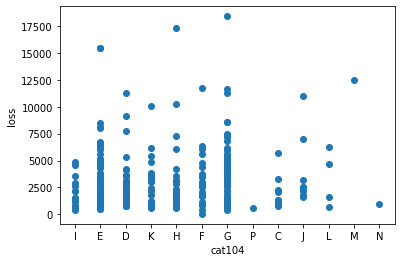

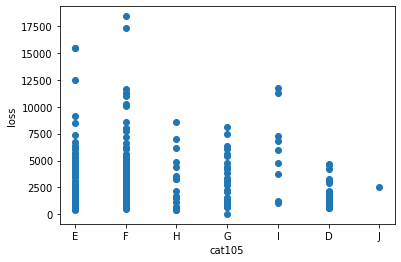

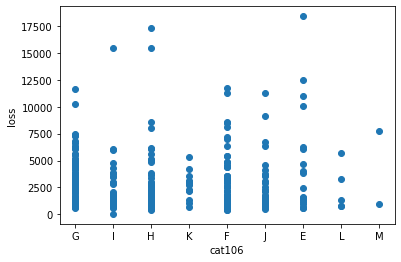

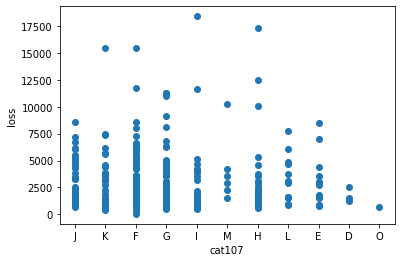

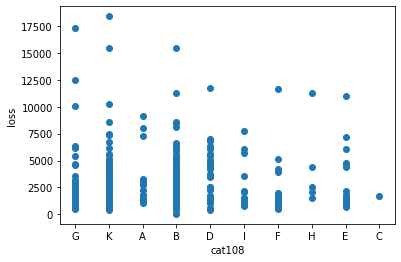

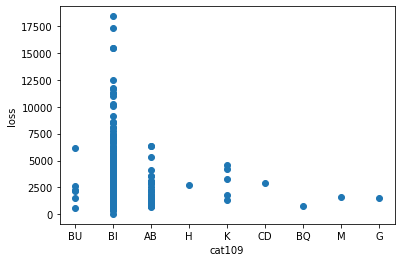

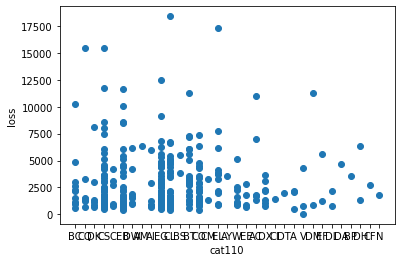

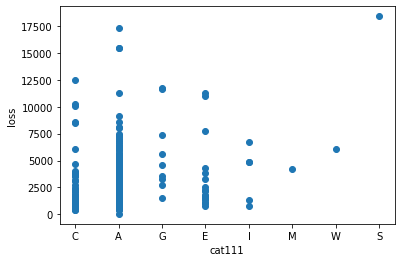

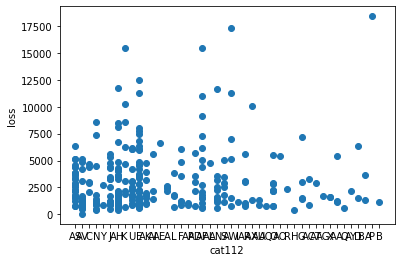

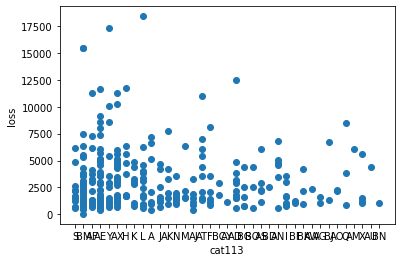

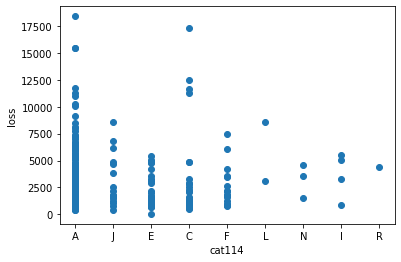

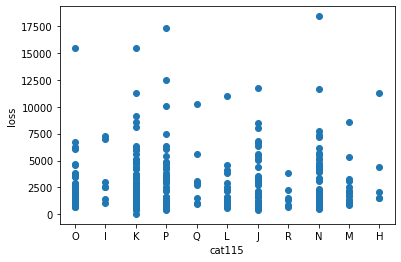

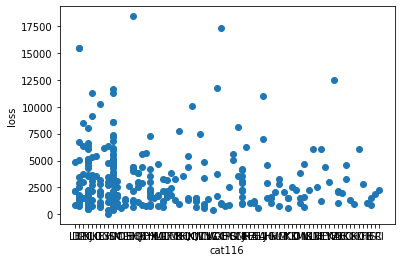

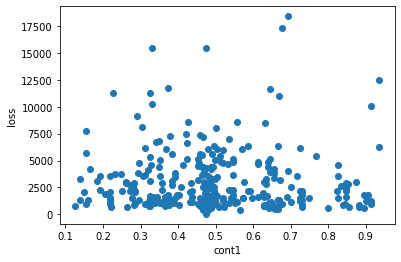

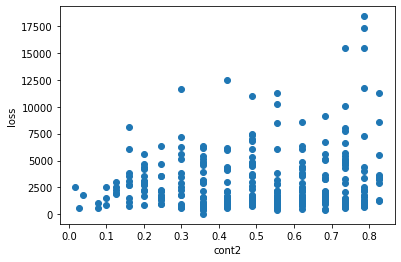

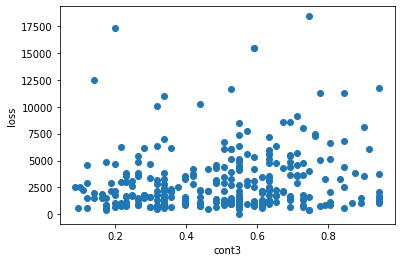

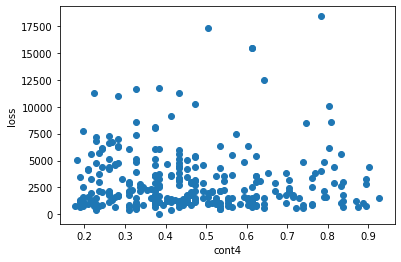

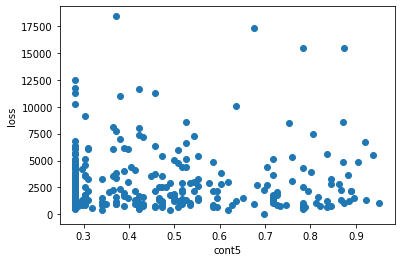

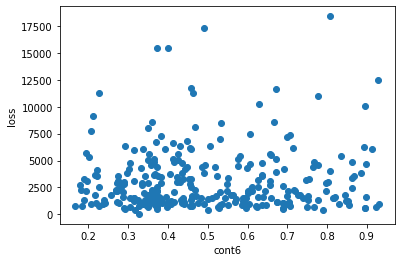

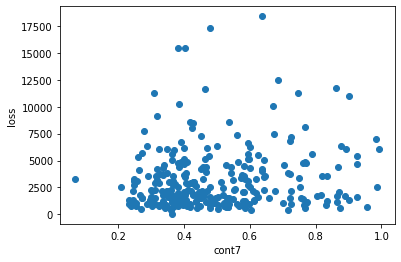

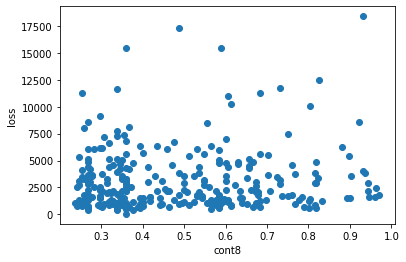

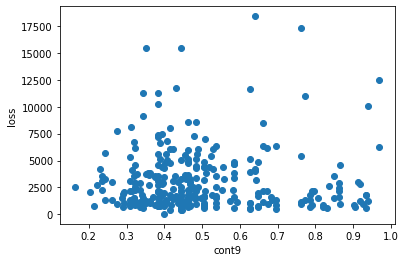

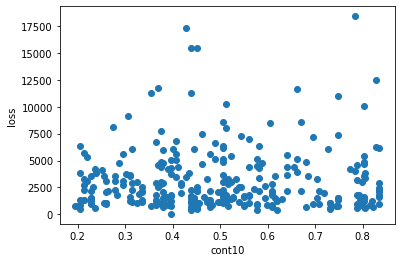

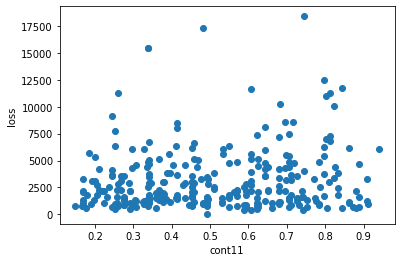

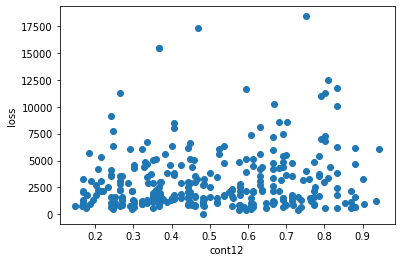

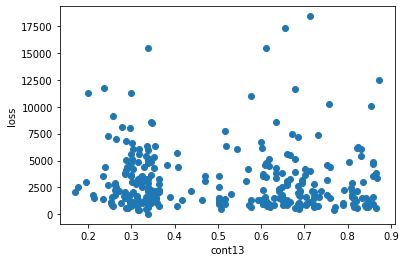

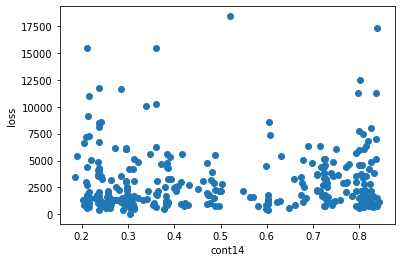

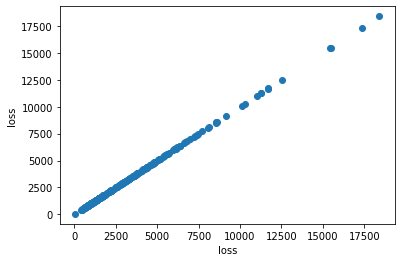

In [64]:
for i in df.columns[:-1]:
    plt.xlabel(i)
    plt.ylabel("loss")
    plt.scatter(df[i][:300],df["loss"][:300])
    plt.show()

In [38]:
model.score(xtrain,ytrain)

1.0

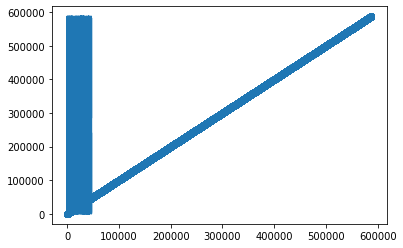

In [94]:
plt.scatter(xtest["id"],ytest)
plt.plot(y_pred)

In [87]:
### Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
lin = LinearRegression()
poly = PolynomialFeatures(degree = 2)
x = np.array(df["id"]).reshape(-1,1)
y = np.array(df["loss"]).reshape(-1,1)
x_train = poly.fit_transform(x)

In [88]:
x_train

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01],
       ...,
       [1.00000000e+00, 5.87630000e+05, 3.45309017e+11],
       [1.00000000e+00, 5.87632000e+05, 3.45311367e+11],
       [1.00000000e+00, 5.87633000e+05, 3.45312543e+11]])

In [89]:
x_train.shape

(188318, 3)

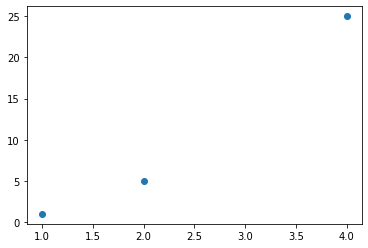

In [90]:
plt.scatter(x_train[1],x_train[2])

In [91]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
print(poly.fit(x_train,y))
print(lin.fit(x_train,y))
lin.intercept_

PolynomialFeatures()
LinearRegression()


array([3031.94493943])

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error

In [41]:
mean_absolute_error(ytest,y_pred)

6.963696855254863e-10

In [42]:
mean_squared_error(ytest,y_pred)

6.436651276460588e-19

In [43]:
model.score(xtrain,ytrain)

1.0